# Pisa 2012 Dataset

## David Owino

## Introduction

International Student Assessment (PISA) is a program initiated by OECD member states to measure how well 15-year-old students at the end of their compulsory schooling are prepared to meet today’s challenges affecting societies. The assessment, which takes place after every three years only focuses on the student's ability to use the skills and knowledge acquired at school to solve real-life challenges. 

PISA is an age-based survey, assessing 15-year-old students in school in grade 7 or higher. About 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics, science, and financial literacy representing about 28 million 15-year-olds globally. The database also includes students' responses to Questionnaires that they completed as 
part of the assessment. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

Two datasets are used in this project. Pisa2012.csv dataset, which contains 485490 observations and 636 coded features, and pisadict.csv containing 635 columns and their descriptions


https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf


## Preliminary Wrangling


In [422]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import requests

%matplotlib inline

>  Download and load the datasets. The pisa2012.csv is a zip file and is approximately 2.75GB when extracted, while pisadict is a csv file containing feature descriptions. The two datasets are programmatically downloaded from Udacity servers and stored on the local computer. And because of the large size, only data for the selected columns are uploaded for this project, however, the method used is provided in the Markdown cells


Download pisa2012.csv.zip file into the working directory

In [423]:
# Download pisa2012.csv.zip file
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip'# provided url

# Downloading the file by sending the request to the URL
#req = requests.get(url)
 
# Split URL to get the file name
#filename = url.split('/')[-1]
 
# Writing the file into the working directory
#with open(filename,'wb') as output_file:
    #output_file.write(req.content)

Extract the downloaded zip file

In [424]:
#with zipfile.ZipFile('pisa2012.csv.zip', 'r') as myzip:
    #myzip.extractall()

Read and load the extracted pisa data to dataframe

In [425]:
#path_data='C:/Users/Davie/Desktop/Data/project_3/'
#df_pisa=pd.read_csv(path_data + 'pisa2012.csv', encoding = 'latin-1', low_memory=False, index_col=False)
#df_pisa

Download the the dictionary for pisa2012 features

In [426]:
# url for pisa dictionary
file_url='https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv'

# store resquest response in csv_response
#csv_response=requests.get(file_url)

# write the response to 'pisadict2012.csv'
#with open('pisadict2012.csv', 'w') as f:
    #f.write(csv_response.text)

In [427]:
# read,load and transpose pisadict.csv data
path_dict='C:/Users/Davie/Desktop/Data/project_3/'
pisa_dict_r=pd.read_csv(path_dict + 'pisadict2012.csv', encoding='latin-1')
pisa_dict_r.head(5)

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


### Dataset structure

> There are two datasets for this project. Pisa2012.csv file for this project is contained in a compressed zip file. The csv file is 2.75GB when extracted. It contains data from 485490 sampled students with 636 features. The dataset contains the results from mathematics, science, readings, and financial literacy examinations as well as students' age, country of residence, family possessions, school and home ICT facilities, first language, education level of the father and mother, occupations, and student's interest and motivations among others. Pisadict2012.csv is 35.4kB containing 636 coded column names and their descriptions.


### Main features of interest in the dataset

> The main features of the dataset are the plausible values for mathematics, science, and reading. According to pisa 2012 report, these plausible values are not the real scores for the listed subjects but are imputed values, which resemble individual test scores and have nearly the same distribution as the latent trait being measured. Many different factors can impact these scores and therefore the average of these estimates across the subgroups will give us the best estimates of the group-level statistics of interest https://www.researchgate.net/publication/257822398_What_are_plausible_values_and_why_are_they_useful


### Features in the dataset that will help support my investigations

> Pisa2012 is a complex dataset. In this project, and after a visual assessment of the dataset, I will retain only the variable of interest to the investigation. I want to investigate (a) how the choice of school play into academic performance (b) whether there are differences in achievement based on gender, location, or student attitudes, and (c) whether there are differences in achievement based on teacher practices and attitudes. 

From pisa2012.sv, the following features are of interest:

- Student's country of residence.

- Student's country economic level (OECD or not)

- Student's gender

- Student's parents' level of education

- Access to computer at school and at home

- home posession

- Age

- perserverence

- Sense of Belonging to School

- Teacher Student Relations

- teacher support

- socio-economic and cultural status index

- Parents Believe Studying Mathematics Is Important'

- All 5 plausible Values in each subject category

From the dictionary file, pisadict2012.csv, I retain only column names corresponding to the above features

### Filtering the required columns

In [428]:
# create list of features to be filtered
required_var=['CNT','OECD','SCHOOLID','STIDSTD',
              'ST01Q01','ST03Q01','ST03Q02','ST04Q01','ST35Q04',
              'IC01Q01','IC02Q01','AGE','ANCBELONG','CLSMAN','ESCS', 'PERSEV', 'ANCATSCHL',
              'FISCED','HOMEPOS','HOMSCH','ICTSCH','MISCED','ANCMTSUP','ANCSTUDREL','TEACHSUP','USESCH',
              'PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
              'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ',
              'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE'
              ]

Filter the data based on the required_var and save the new data as pisa2012_edited.csv

In [429]:
#pisa2012_edited=df_pisa.filter(required_var) # filter the required features
#pisa2012_edited.to_csv('pisa2012_edited.csv') # save the new data as pisa2012_edited

## Data Wrangling

### Assessing Data
The data is assessed visually and programmatically for quality and tidiness issues 

**Quality issues**- Issues related to the data content (dirty data). We check for four quality diemnsions, completeness, validity, accuracy and consistency.

**Tidiness issues**- Issues related to the data structure (messy data). We check whether or not each variable forms a column, each observation forms a row or each type of observational unit forms a table

### **1. visual assessment**

- viewing the data without code

In [430]:
# load pisa2012_edited
path_data_edited='C:/Users/Davie/Desktop/Data/project_3/'
df_pisa_edited=pd.read_csv(path_data_edited +'pisa2012_edited.csv', encoding = 'latin-1', low_memory=False, index_col=False)
df_pisa_edited.head(5)

,Unnamed: 0,CNT,OECD,SCHOOLID,STIDSTD,ST01Q01,ST03Q01,ST03Q02,ST04Q01,ST35Q04,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,0,Albania,Non-OECD,1,1,10,2,1996,Female,Agree,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,1,Albania,Non-OECD,1,2,10,2,1996,Female,Agree,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,2,Albania,Non-OECD,1,3,9,9,1996,Female,Strongly agree,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,3,Albania,Non-OECD,1,4,9,8,1996,Female,NaN,...,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,4,Albania,Non-OECD,1,5,9,10,1996,Female,Strongly agree,...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


1.Five plausible values in each category of subjects mathematics, reading and science, should be 3 variables (tidiness issue)

2.Non-descriptive columns in df_pisa_edited data (quality issue)

### **2. programmatic assessement**

- checking data issues with (code) python methods.We use ```.sample() .shape, .describe(), .info(), .dtypes, .nunique()```

In [431]:
df_pisa_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  485490 non-null  int64  
 1   CNT         485490 non-null  object 
 2   OECD        485490 non-null  object 
 3   SCHOOLID    485490 non-null  int64  
 4   STIDSTD     485490 non-null  int64  
 5   ST01Q01     485490 non-null  int64  
 6   ST03Q01     485490 non-null  int64  
 7   ST03Q02     485490 non-null  int64  
 8   ST04Q01     485490 non-null  object 
 9   ST35Q04     315160 non-null  object 
 10  IC01Q01     296977 non-null  object 
 11  IC02Q01     296975 non-null  object 
 12  AGE         485374 non-null  float64
 13  ANCBELONG   307640 non-null  float64
 14  CLSMAN      312708 non-null  float64
 15  ESCS        473648 non-null  float64
 16  PERSEV      313172 non-null  float64
 17  ANCATSCHL   306835 non-null  float64
 18  FISCED      452903 non-null  object 
 19  HO

3.Incorrect data types for SCHOOLID and STIDSTD columns, datatype is of integer. AGE is of float (quality issue)

4.Columns ST01Q01 and ST03Q01 is date of birth, one variable (tidiness issue)

In [432]:
df_pisa_edited['FISCED'].value_counts()

ISCED 3A, ISCED 4    118890
ISCED 5A, 6          113406
ISCED 2               66728
ISCED 5B              61617
ISCED 3B, C           39789
ISCED 1               35938
None                  16535
Name: FISCED, dtype: int64

In [433]:
df_pisa_edited['MISCED'].value_counts()

ISCED 3A, ISCED 4    126768
ISCED 5A, 6          114452
ISCED 5B              68219
ISCED 2               66650
ISCED 1               36556
ISCED 3B, C           35672
None                  18768
Name: MISCED, dtype: int64

5.'FISCED' and 'MISCED' for father education and mother education, are not valid, rename (quality issue)

6.Missing values (quality issue)

## Cleaning Data

This aims to improve the quality and tidiness by correcting the inaccuracies, removing the irrelevant columns, renaming columns and replacing missing values, or droping rows with the missing values based on the assessment already done

Cleaning data uses programmatic data cleaning process, in which every issue identified in the assessment section is first defined followed by codng and testing.

In [434]:
# Make copies of original pieces of data: df_pisa_edited and pisa_dict_r
df_pisa2012=df_pisa_edited.copy()
pisadict2012=pisa_dict_r.copy()

### Issue #1: Five plausible values in each category of subjects mathematics, reading and science, 3 variables

#### Define: Average five pairs of plausible values in each category into 3 columns: score_in_maths, score_in_reading and score_in_science. 

#### Code

Create 3 columns for the average of the plausible values, add column (total_score) for the sum of average values, and finally drop the plausible values

In [435]:
# plausible average for mathematics
df_pisa2012['math']=np.average(df_pisa2012[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']], axis=1) 
# plausible average for reading
df_pisa2012['reading']=np.average(df_pisa2012[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']], axis=1)
# plausible average for science
df_pisa2012['science']=np.average(df_pisa2012[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']], axis=1)
df_pisa2012.head(5)

,Unnamed: 0,CNT,OECD,SCHOOLID,STIDSTD,ST01Q01,ST03Q01,ST03Q02,ST04Q01,ST35Q04,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,math,reading,science
0,0,Albania,Non-OECD,1,1,10,2,1996,Female,Agree,...,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348
1,1,Albania,Non-OECD,1,2,10,2,1996,Female,Agree,...,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382
2,2,Albania,Non-OECD,1,3,9,9,1996,Female,Strongly agree,...,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946
3,3,Albania,Non-OECD,1,4,9,8,1996,Female,NaN,...,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,449.45476,477.46376,453.97240
4,4,Albania,Non-OECD,1,5,9,10,1996,Female,Strongly agree,...,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778


In [436]:
# sum of all scores in mathematics, reading and science
df_pisa2012['total']=np.sum(df_pisa2012[['math', 'reading', 'science']], axis=1)
df_pisa2012.head(5)

,Unnamed: 0,CNT,OECD,SCHOOLID,STIDSTD,ST01Q01,ST03Q01,ST03Q02,ST04Q01,ST35Q04,...,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,math,reading,science,total
0,0,Albania,Non-OECD,1,1,10,2,1996,Female,Agree,...,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348,999.11406
1,1,Albania,Non-OECD,1,2,10,2,1996,Female,Agree,...,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382,1333.37610
2,2,Albania,Non-OECD,1,3,9,9,1996,Female,Strongly agree,...,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946,1397.32924
3,3,Albania,Non-OECD,1,4,9,8,1996,Female,NaN,...,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,449.45476,477.46376,453.97240,1380.89092
4,4,Albania,Non-OECD,1,5,9,10,1996,Female,Strongly agree,...,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778,1008.67186


In [437]:
# drop the plausible column values
pisa_df=df_pisa2012.iloc[:, np.r_[0:26, 42:46]]
pisa_df.head(5)

,Unnamed: 0,CNT,OECD,SCHOOLID,STIDSTD,ST01Q01,ST03Q01,ST03Q02,ST04Q01,ST35Q04,...,HOMSCH,ICTSCH,MISCED,ANCMTSUP,ANCSTUDREL,TEACHSUP,math,reading,science,total
0,0,Albania,Non-OECD,1,1,10,2,1996,Female,Agree,...,NaN,NaN,"ISCED 3A, ISCED 4",-0.5983,-0.5901,1.68,366.18634,261.01424,371.91348,999.11406
1,1,Albania,Non-OECD,1,2,10,2,1996,Female,Agree,...,NaN,NaN,"ISCED 5A, 6",NaN,NaN,NaN,470.56396,384.68832,478.12382,1333.37610
2,2,Albania,Non-OECD,1,3,9,9,1996,Female,Strongly agree,...,NaN,NaN,"ISCED 5A, 6",NaN,NaN,NaN,505.53824,405.18154,486.60946,1397.32924
3,3,Albania,Non-OECD,1,4,9,8,1996,Female,NaN,...,NaN,NaN,"ISCED 3B, C",NaN,NaN,1.68,449.45476,477.46376,453.97240,1380.89092
4,4,Albania,Non-OECD,1,5,9,10,1996,Female,Strongly agree,...,NaN,NaN,None,0.4052,0.2492,0.11,385.50398,256.01010,367.15778,1008.67186


#### Test

In [438]:
pisa_df.shape

(485490, 30)

### Issue #2: Non-descriptive columns in df_pisa_edited data

#### Define: Rename the columns using the discription provided in the pisadict2012

#### Code

Rename columns on pisadict2012, filter the required features from the dictionary, create dictionary to for renaming columns, rename the columns

In [439]:
# rename columns
pisadict2012.set_axis(['short_name', 'description'],axis=1,inplace=True)
# transpose using short _name as index
pisa_dict_trans=pisadict2012.set_index('short_name').T
pisa_dict_trans

short_name,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
description,Country code 3-character,Adjudicated sub-region code 7-digit code (3-di...,Stratum ID 7-character (cnt + region ID + orig...,OECD country,National Centre 6-digit Code,School ID 7-digit (region ID + stratum ID + 3-...,Student ID,International Grade,National Study Programme,Birth - Month,...,FINAL STUDENT REPLICATE BRR-FAY WEIGHT75,FINAL STUDENT REPLICATE BRR-FAY WEIGHT76,FINAL STUDENT REPLICATE BRR-FAY WEIGHT77,FINAL STUDENT REPLICATE BRR-FAY WEIGHT78,FINAL STUDENT REPLICATE BRR-FAY WEIGHT79,FINAL STUDENT REPLICATE BRR-FAY WEIGHT80,RANDOMIZED FINAL VARIANCE STRATUM (1-80),RANDOMLY ASSIGNED VARIANCE UNIT,Senate weight - sum of weight within the count...,Date of the database creation


In [440]:
# filter the required features from the dictionary
pisa_dict_f=pisa_dict_trans.filter(required_var)
# tranpose to two columns
pisa_dict_filtered=pisa_dict_f.T
# reset index
pisa_dict_filtered=pisa_dict_filtered.reset_index(level=0) # alternative df['index']=df.index
pisa_dict_filtered.head(5)

,short_name,description
0,CNT,Country code 3-character
1,OECD,OECD country
2,SCHOOLID,School ID 7-digit (region ID + stratum ID + 3-...
3,STIDSTD,Student ID
4,ST01Q01,International Grade


In [441]:
# create dictionary to for renaming columns
col_rename_dict=pisa_dict_filtered.set_index('short_name')['description'].to_dict()
col_rename_dict

{'CNT': 'Country code 3-character',
 'OECD': 'OECD country',
 'SCHOOLID': 'School ID 7-digit (region ID + stratum ID + 3-digit school ID)',
 'STIDSTD': 'Student ID',
 'ST01Q01': 'International Grade',
 'ST03Q01': 'Birth - Month',
 'ST03Q02': 'Birth -Year',
 'ST04Q01': 'Gender',
 'ST35Q04': 'Subjective Norms - Parents Believe Studying Mathematics Is Important',
 'IC01Q01': 'At Home - Desktop Computer',
 'IC02Q01': 'At school - Desktop Computer',
 'AGE': 'Age of student',
 'ANCBELONG': 'Sense of Belonging to School (Anchored)',
 'CLSMAN': "Mathematics Teacher's Classroom Management",
 'ESCS': 'Index of economic, social and cultural status',
 'PERSEV': 'Perseverance',
 'ANCATSCHL': 'Attitude towards School: Learning Outcomes (Anchored)',
 'FISCED': 'Educational level of father (ISCED)',
 'HOMEPOS': 'Home Possessions',
 'HOMSCH': 'ICT Use at Home for School-related Tasks',
 'ICTSCH': 'ICT Availability at School',
 'MISCED': 'Educational level of mother (ISCED)',
 'ANCMTSUP': "Mathematics T

Copy the above cell and edit accordingly

In [442]:
# dictionary for descriptive names
_dict={'CNT': 'country',
       'OECD': 'oecd',
       'SCHOOLID': 'school_id',
       'STIDSTD': 'student_id',
       'ST01Q01': 'international_grade',
       'ST03Q01': 'month_of_birth',
       'ST03Q02': 'year_of_birth', 
       'ST04Q01': 'gender',
       'AGE': 'student_age', 
       
       'PERSEV': 'perseverance',
       'ANCATSCHL': 'attitude_towards_school_learning_outcomes', 
       'ANCBELONG': 'sense_of_belonging_to_school',
       
       'HOMEPOS': 'home_possessions', 
       'HOMSCH': 'ICT_use_at_home_for_school_tasks',
       'IC01Q01': 'home_desktop_computer',
       
       'ST35Q04': 'parents_believe_maths_is_important',
       'ESCS': 'social_economic&cultural_index_status',  
       'FISCED': 'father_educational_level', 
       'MISCED': 'mother_educational_level',
       
       'IC02Q01': 'school_desktop_computer',
       'CLSMAN': "maths_teacher_classroom_management",
       'ICTSCH': 'ICT_at_school',
       'ANCMTSUP': "maths_teacher_support",
       'ANCSTUDREL': 'teacher_student_relations',
       'TEACHSUP': 'teacher_support',
       'USESCH': 'ICT_use_at_school',
       
       'math': 'score_in_mathematics',
       'reading': 'score_in_reading',
       'science': 'score_in_science',
       'total':'total_score'
      }

In [443]:
# rename the columns
pisa_df=pisa_df.rename(columns=_dict)
pisa_df.head(5)

,Unnamed: 0,country,oecd,school_id,student_id,international_grade,month_of_birth,year_of_birth,gender,parents_believe_maths_is_important,...,ICT_use_at_home_for_school_tasks,ICT_at_school,mother_educational_level,maths_teacher_support,teacher_student_relations,teacher_support,score_in_mathematics,score_in_reading,score_in_science,total_score
0,0,Albania,Non-OECD,1,1,10,2,1996,Female,Agree,...,NaN,NaN,"ISCED 3A, ISCED 4",-0.5983,-0.5901,1.68,366.18634,261.01424,371.91348,999.11406
1,1,Albania,Non-OECD,1,2,10,2,1996,Female,Agree,...,NaN,NaN,"ISCED 5A, 6",NaN,NaN,NaN,470.56396,384.68832,478.12382,1333.37610
2,2,Albania,Non-OECD,1,3,9,9,1996,Female,Strongly agree,...,NaN,NaN,"ISCED 5A, 6",NaN,NaN,NaN,505.53824,405.18154,486.60946,1397.32924
3,3,Albania,Non-OECD,1,4,9,8,1996,Female,NaN,...,NaN,NaN,"ISCED 3B, C",NaN,NaN,1.68,449.45476,477.46376,453.97240,1380.89092
4,4,Albania,Non-OECD,1,5,9,10,1996,Female,Strongly agree,...,NaN,NaN,None,0.4052,0.2492,0.11,385.50398,256.01010,367.15778,1008.67186


In [444]:
# index columns
values_list = list(_dict.values())
pisa_df = pisa_df.reindex(columns=values_list)

#### Test

In [445]:
pisa_df.columns

Index(['country', 'oecd', 'school_id', 'student_id', 'international_grade',
       'month_of_birth', 'year_of_birth', 'gender', 'student_age',
       'perseverance', 'attitude_towards_school_learning_outcomes',
       'sense_of_belonging_to_school', 'home_possessions',
       'ICT_use_at_home_for_school_tasks', 'home_desktop_computer',
       'parents_believe_maths_is_important',
       'social_economic&cultural_index_status', 'father_educational_level',
       'mother_educational_level', 'school_desktop_computer',
       'maths_teacher_classroom_management', 'ICT_at_school',
       'maths_teacher_support', 'teacher_student_relations', 'teacher_support',
       'ICT_use_at_school', 'score_in_mathematics', 'score_in_reading',
       'score_in_science', 'total_score'],
      dtype='object')

### Issue #3: Incorrect data types for SCHOOLID and STIDSTD columns, datatype is of integer. AGE is of float 

#### Define: Change the data types for school_id , student_id , international_grade, month_of_birth, year_of_birth and student_age to object  

#### Code

In [446]:
# columns with wrong data type (float) to be changed to string
num_type=['school_id','student_id', 'international_grade', 'month_of_birth', 'year_of_birth', 'student_age']
# change data type to string
pisa_df[num_type]=pisa_df[num_type].astype(str)

#### Test

In [447]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 30 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   country                                    485490 non-null  object 
 1   oecd                                       485490 non-null  object 
 2   school_id                                  485490 non-null  object 
 3   student_id                                 485490 non-null  object 
 4   international_grade                        485490 non-null  object 
 5   month_of_birth                             485490 non-null  object 
 6   year_of_birth                              485490 non-null  object 
 7   gender                                     485490 non-null  object 
 8   student_age                                485490 non-null  object 
 9   perseverance                               313172 non-null  float64
 10  attitude

### Issue #4: Columns ST01Q01 and ST03Q01 is date of birth, one variable

#### Define: Merge month of birth and year of birth into one column, called date of birth

#### Code

In [448]:
# combine month and year of birth to date of birth
pisa_df['date_of_birth']=pisa_df[['month_of_birth', 'year_of_birth']].agg('/'.join, axis=1)

In [449]:
# drop the month and year of birth columns
pisa_df=pisa_df.iloc[:, np.r_[0:5, 7:31]]              

#### Test

In [450]:
pisa_df.columns

Index(['country', 'oecd', 'school_id', 'student_id', 'international_grade',
       'gender', 'student_age', 'perseverance',
       'attitude_towards_school_learning_outcomes',
       'sense_of_belonging_to_school', 'home_possessions',
       'ICT_use_at_home_for_school_tasks', 'home_desktop_computer',
       'parents_believe_maths_is_important',
       'social_economic&cultural_index_status', 'father_educational_level',
       'mother_educational_level', 'school_desktop_computer',
       'maths_teacher_classroom_management', 'ICT_at_school',
       'maths_teacher_support', 'teacher_student_relations', 'teacher_support',
       'ICT_use_at_school', 'score_in_mathematics', 'score_in_reading',
       'score_in_science', 'total_score', 'date_of_birth'],
      dtype='object')

### Issue #5: 'FISCED' and 'MISCED'for father education and mother education, are not valid, rename

In [451]:
# assess the eduactional level of the father
pisa_df['father_educational_level'].value_counts()

ISCED 3A, ISCED 4    118890
ISCED 5A, 6          113406
ISCED 2               66728
ISCED 5B              61617
ISCED 3B, C           39789
ISCED 1               35938
None                  16535
Name: father_educational_level, dtype: int64

#### Define: Replace father education and mother education

Indices on parental education were constructed by recoding educational qualifications into the following categories and provided in MISCED for mother education and FISCED for father education:

(0) None

(1) <ISCED level 1> (primary education)

(2) <ISCED level 2> (lower secondary)

(3) <ISCED level 3B or 3C> (vocational/pre-vocational upper secondary)

(4) <ISCED level 3A> (general upper secondary) and/or <ISCED level 4> (non-tertiary post-secondary)

(5) <ISCED level 5B> (vocational tertiary)
 
(6) <ISCED level 5A> and/or <ISCED level 6> (theoretically oriented tertiary and post-graduate) 

https://www.oecd-ilibrary.org/sites/0a428b07-en/index.html?itemId=/content/component/0a428b07-en


Replace the values as follow:


0 None

ISCED level 1 - primary education

ISCED level 2 - lower secondary

ISCED level 3B, C - pre-vocational/vocational upper secondary

ISCED level 3A, 4 - general upper secondary/non-tertiary post-secondary

ISCED level 5B - vocational tertiary
 
ISCED level 5A, 6 -theoretically oriented tertiary/post-graduate

#### Code

In [452]:
# make copy
pisa_data_df=pisa_df.copy()
# create function to replace educational values
def parent_education(parent):
    if parent=='father':
        parent='father_educational_level'
    if parent=='mother':
        parent='mother_educational_level'
    pisa_data_df.loc[(pisa_data_df[parent]== 'ISCED 1'),parent] = 'Primary Education'
    pisa_data_df.loc[(pisa_data_df[parent]== 'ISCED 2'),parent] = 'Lower Secondary'
    pisa_data_df.loc[(pisa_data_df[parent]== 'ISCED 3B, C'),parent] = 'Upper Secondary'
    pisa_data_df.loc[(pisa_data_df[parent]== 'ISCED 3A, ISCED 4'),parent] = 'Post Secondary'
    pisa_data_df.loc[(pisa_data_df[parent]== 'ISCED 5B'),parent] = 'Vocational Tertiary'
    pisa_data_df.loc[(pisa_data_df[parent]== 'ISCED 5A, 6'),parent] = 'Post Graduate'

In [453]:
# rename father educational values
parent_education('father')  

In [454]:
# rename mother educational values
parent_education('mother')  

In [455]:
pisa_data_df.head(5)

,country,oecd,school_id,student_id,international_grade,gender,student_age,perseverance,attitude_towards_school_learning_outcomes,sense_of_belonging_to_school,...,ICT_at_school,maths_teacher_support,teacher_student_relations,teacher_support,ICT_use_at_school,score_in_mathematics,score_in_reading,score_in_science,total_score,date_of_birth
0,Albania,Non-OECD,1,1,10,Female,16.17,-0.3407,-1.8636,-0.7351,...,NaN,-0.5983,-0.5901,1.68,NaN,366.18634,261.01424,371.91348,999.11406,2/1996
1,Albania,Non-OECD,1,2,10,Female,16.17,1.3116,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,470.56396,384.68832,478.12382,1333.37610,2/1996
2,Albania,Non-OECD,1,3,9,Female,15.58,0.9918,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,505.53824,405.18154,486.60946,1397.32924,9/1996
3,Albania,Non-OECD,1,4,9,Female,15.67,NaN,NaN,NaN,...,NaN,NaN,NaN,1.68,NaN,449.45476,477.46376,453.97240,1380.89092,8/1996
4,Albania,Non-OECD,1,5,9,Female,15.5,1.0819,0.6517,0.8675,...,NaN,0.4052,0.2492,0.11,NaN,385.50398,256.01010,367.15778,1008.67186,10/1996


In [456]:
# drop rows with duplicate values
pisa_clean_df=pisa_data_df.dropna(how='all', axis=1)

In [457]:
pisa_clean_df#.head(5)

,country,oecd,school_id,student_id,international_grade,gender,student_age,perseverance,attitude_towards_school_learning_outcomes,sense_of_belonging_to_school,...,maths_teacher_classroom_management,ICT_at_school,maths_teacher_support,teacher_student_relations,teacher_support,score_in_mathematics,score_in_reading,score_in_science,total_score,date_of_birth
0,Albania,Non-OECD,1,1,10,Female,16.17,-0.3407,-1.8636,-0.7351,...,-1.3771,NaN,-0.5983,-0.5901,1.68,366.18634,261.01424,371.91348,999.11406,2/1996
1,Albania,Non-OECD,1,2,10,Female,16.17,1.3116,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,470.56396,384.68832,478.12382,1333.37610,2/1996
2,Albania,Non-OECD,1,3,9,Female,15.58,0.9918,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,505.53824,405.18154,486.60946,1397.32924,9/1996
3,Albania,Non-OECD,1,4,9,Female,15.67,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.68,449.45476,477.46376,453.97240,1380.89092,8/1996
4,Albania,Non-OECD,1,5,9,Female,15.5,1.0819,0.6517,0.8675,...,-0.0784,NaN,0.4052,0.2492,0.11,385.50398,256.01010,367.15778,1008.67186,10/1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485485,Vietnam,Non-OECD,162,4955,10,Female,15.83,0.2586,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,486.22058,472.61846,536.31110,1495.15014,6/1996
485486,Vietnam,Non-OECD,162,4956,10,Male,16.17,-0.3407,0.1565,-0.0611,...,-0.0784,NaN,0.5831,-0.1113,0.11,529.21794,487.24356,524.37522,1540.83672,2/1996
485487,Vietnam,Non-OECD,162,4957,10,Male,15.83,0.4795,-0.3395,-0.1489,...,-0.0784,NaN,-0.1687,-0.2217,-0.09,486.29850,476.25694,541.90600,1504.46144,6/1996
485488,Vietnam,Non-OECD,162,4958,10,Male,15.83,NaN,0.2818,0.1992,...,0.3255,NaN,0.2669,0.2492,-0.09,522.90856,518.43922,526.70646,1568.05424,6/1996


In [458]:

# save pisa_df as pisa_clean.csv
pisa_clean_df.to_csv('pisa_clean.csv', index=False)

#### Test

In [459]:
pisa_df['father_educational_level'].value_counts()

ISCED 3A, ISCED 4    118890
ISCED 5A, 6          113406
ISCED 2               66728
ISCED 5B              61617
ISCED 3B, C           39789
ISCED 1               35938
None                  16535
Name: father_educational_level, dtype: int64

In [460]:
pisa_df['mother_educational_level'].value_counts()

ISCED 3A, ISCED 4    126768
ISCED 5A, 6          114452
ISCED 5B              68219
ISCED 2               66650
ISCED 1               36556
ISCED 3B, C           35672
None                  18768
Name: mother_educational_level, dtype: int64

In [461]:
path_clean= 'C:/Users/Davie/Documents/GitHub/Pisa2012_data_analysis/'
pisa_clean=pd.read_csv(path_clean + 'pisa_clean.csv')
pisa_clean.dropna(how='any', inplace=True)
pisa_clean

,country,oecd,school_id,student_id,international_grade,gender,student_age,perseverance,attitude_towards_school_learning_outcomes,sense_of_belonging_to_school,...,maths_teacher_classroom_management,ICT_at_school,maths_teacher_support,teacher_student_relations,teacher_support,score_in_mathematics,score_in_reading,score_in_science,total_score,date_of_birth
22156,Australia,OECD,1,6,10,Female,16.08,1.7171,0.2818,0.1459,...,-0.4499,0.8574,0.5831,0.7959,0.97,625.96198,655.86582,668.44462,1950.27242,7/1996
22157,Australia,OECD,1,7,11,Female,16.00,1.3116,1.6884,1.6572,...,0.7640,0.2340,2.6379,0.7959,0.97,661.87100,737.91804,768.78030,2168.56934,8/1996
22158,Australia,OECD,1,8,10,Male,16.08,0.7205,2.1880,0.8675,...,1.2923,0.8574,1.1554,1.5296,0.97,639.35974,681.31428,736.42298,2057.09700,7/1996
22159,Australia,OECD,1,9,10,Male,15.67,0.7205,0.6517,0.7509,...,2.1989,1.5045,0.8270,1.0099,1.68,467.52608,517.63730,562.42074,1547.58412,12/1996
22164,Australia,OECD,1,14,10,Female,15.67,-0.3407,0.4410,0.2570,...,0.7640,0.8574,0.5831,0.3536,1.68,589.35194,664.84150,634.31554,1888.50898,12/1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475542,Uruguay,Non-OECD,180,5305,10,Female,16.25,3.5286,0.4410,0.3895,...,0.3255,0.5423,0.5831,0.4759,0.11,533.89156,492.63508,489.12720,1515.65384,5/1996
475544,Uruguay,Non-OECD,180,5307,10,Female,15.67,0.0511,-0.0377,0.6458,...,1.2923,1.4368,0.4052,0.3536,1.68,436.13490,451.41038,449.03022,1336.57550,12/1996
475547,Uruguay,Non-OECD,180,5310,10,Male,15.42,-0.3407,-0.0377,-0.2191,...,-0.0784,-0.7538,-0.1687,-0.1113,0.11,446.65058,375.93360,370.88774,1193.47192,3/1997
475549,Uruguay,Non-OECD,180,5312,10,Female,16.00,1.3116,0.1565,-0.1123,...,2.1989,-1.0936,0.2669,0.3536,0.61,469.31766,502.96112,446.79226,1419.07104,8/1996


## Univariate Exploration

> This section investigates the distributions of individual variables for unusual points or outliers. The features of interest are divided into two, categorical and numeric variables. For categorical variables, count plots, pie charts, donut plots, waffle counts, and bar graphs are used. The distributions of numeric variables of interest are investigated using histogram, and box plots.

### Categorical Variables

In [462]:
# create categorical variables
categoric_vars = ['country','oecd','school_id','student_id','international_grade','gender',
                  'student_age','school_desktop_computer', 'home_desktop_computer',
                  'mother_educational_level', 'father_educational_level', 
                  'parents_believe_maths_is_important', 'date_of_birth']

### Question 1: How many students took the pisa test per country?

Use countplot or horizontal bar graph to display the frequency or counts of each participating country

### Visualization

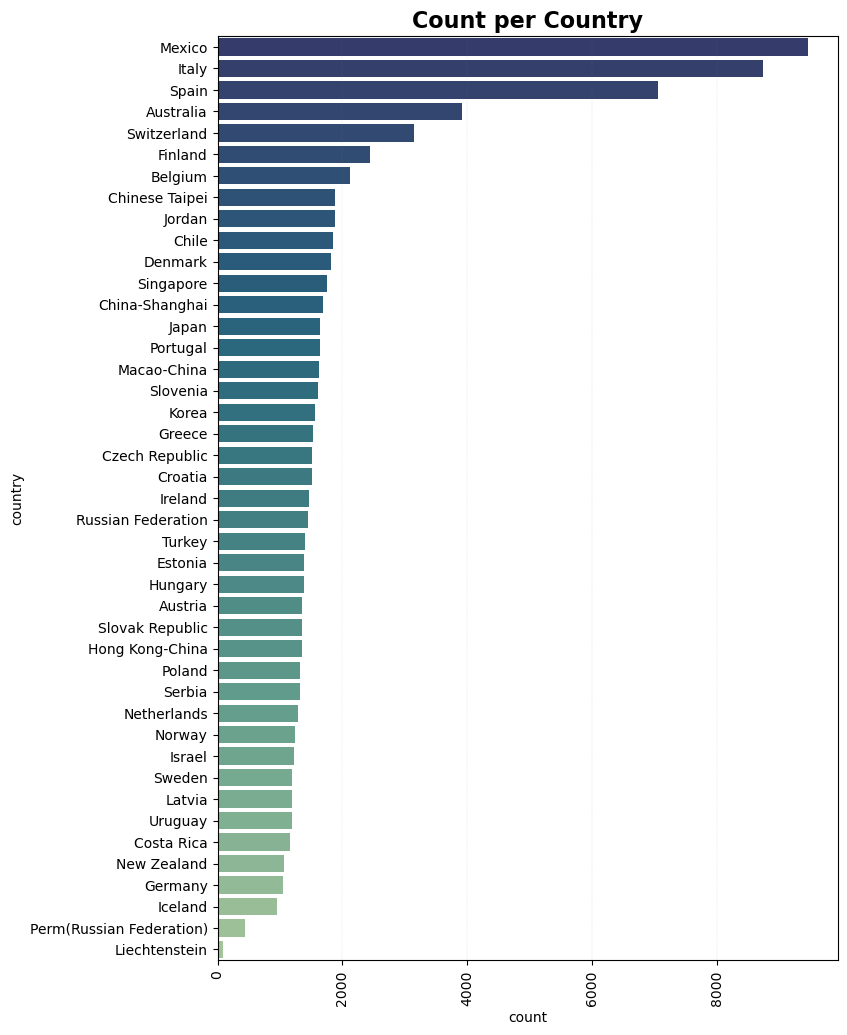

In [463]:
# set plot dimensions
plt.figure(figsize=[8, 12])

# Returns a Series
freq = pisa_clean['country'].value_counts()

# Get the indexes of the Series
gen_order = freq.index
# plot countplot
sb.countplot(data=pisa_clean, y=pisa_clean['country'],  palette='crest_r', order=gen_order) #edgecolor='blue', color='grey',
plt.grid(axis='x', color ='grey', linestyle ='-.', linewidth = 0.2, alpha = 0.4) # b=True - for both x and y axes
plt.title('Count per Country', fontsize=16, fontweight='bold')
# Use xticks to rotate the category labels
plt.xticks(rotation=90)

plt.show();

### Observation

The top three countries with the highest number of students who took part in the pisa test are Mexico, Italy, and Spain, with Liechtenstein having the least number of respondence.

### Question 2: How many students took the pisa test per gender and per grade?

Use a histogram to check the distribution, normality, or skewness of scores per each subject category as well as total_score.

### Visualization

Create count plots for gender and grade level

In [464]:
# columns with wrong data type (float) to be changed to string
num_type=['international_grade']
# change data type to string
pisa_clean[num_type]=pisa_clean[num_type].astype(str)
# replace code 96 with ungraded
pisa_clean['international_grade']=pisa_clean['international_grade'].replace(['96'], '(ungraded)')
pisa_clean['gender'].value_counts()

Female    43964
Male      42381
Name: gender, dtype: int64

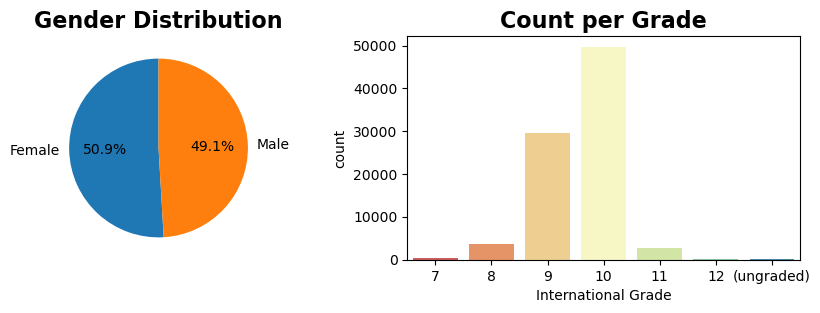

In [465]:
# set plot dimensions
#plt.figure(figsize=[14, 8])
width_in_pixels = 1150
height_in_pixels =730
dpi = 130
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

# Returns a Series
plt.subplot(2,2,1)

# Count the occurrences of each gender based on the specified order
gender_counts = pisa_clean['gender'].value_counts().reindex()

# Plot the pie chart
plt.pie(
    gender_counts, 
    labels=['Female', 'Male'],
    autopct='%1.1f%%',  # Show percentages
    startangle=90  # Start angle for better readability
)
plt.title('Gender Distribution', fontsize=16, fontweight='bold')

plt.subplot(2,2,2)
# Returns a Series
freq = pisa_clean['international_grade'].value_counts()
# order the grades
grade_order =['7', '8', '9', '10', '11', '12', '(ungraded)']#freq.index
# plot countplot
sb.countplot(data=pisa_clean, x=pisa_clean['international_grade'], palette='Spectral', order=grade_order)
plt.title('Count per Grade', fontsize=16, fontweight='bold')
plt.xlabel('International Grade')

plt.tight_layout() 
# Saving the plot
plt.savefig('gender_grade_count.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

From the visualization, it is evident that there were more female students as compared to male students who took part in the pisa interview. Inaddition, most of the students interviwed were from grade 10 and 9 respectivley

### Question 3: What is the proportion of parents who believe that mathematics is important to their children?

Use a pie chart to compute the percent in each category.

### Visualization

In [466]:
pisa_clean.columns

Index(['country', 'oecd', 'school_id', 'student_id', 'international_grade',
       'gender', 'student_age', 'perseverance',
       'attitude_towards_school_learning_outcomes',
       'sense_of_belonging_to_school', 'home_possessions',
       'ICT_use_at_home_for_school_tasks', 'home_desktop_computer',
       'parents_believe_maths_is_important',
       'social_economic&cultural_index_status', 'father_educational_level',
       'mother_educational_level', 'school_desktop_computer',
       'maths_teacher_classroom_management', 'ICT_at_school',
       'maths_teacher_support', 'teacher_student_relations', 'teacher_support',
       'score_in_mathematics', 'score_in_reading', 'score_in_science',
       'total_score', 'date_of_birth'],
      dtype='object')

In [467]:
pisa_clean[~pisa_clean['attitude_towards_school_learning_outcomes'].isna()]

,country,oecd,school_id,student_id,international_grade,gender,student_age,perseverance,attitude_towards_school_learning_outcomes,sense_of_belonging_to_school,...,maths_teacher_classroom_management,ICT_at_school,maths_teacher_support,teacher_student_relations,teacher_support,score_in_mathematics,score_in_reading,score_in_science,total_score,date_of_birth
22156,Australia,OECD,1,6,10,Female,16.08,1.7171,0.2818,0.1459,...,-0.4499,0.8574,0.5831,0.7959,0.97,625.96198,655.86582,668.44462,1950.27242,7/1996
22157,Australia,OECD,1,7,11,Female,16.00,1.3116,1.6884,1.6572,...,0.7640,0.2340,2.6379,0.7959,0.97,661.87100,737.91804,768.78030,2168.56934,8/1996
22158,Australia,OECD,1,8,10,Male,16.08,0.7205,2.1880,0.8675,...,1.2923,0.8574,1.1554,1.5296,0.97,639.35974,681.31428,736.42298,2057.09700,7/1996
22159,Australia,OECD,1,9,10,Male,15.67,0.7205,0.6517,0.7509,...,2.1989,1.5045,0.8270,1.0099,1.68,467.52608,517.63730,562.42074,1547.58412,12/1996
22164,Australia,OECD,1,14,10,Female,15.67,-0.3407,0.4410,0.2570,...,0.7640,0.8574,0.5831,0.3536,1.68,589.35194,664.84150,634.31554,1888.50898,12/1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475542,Uruguay,Non-OECD,180,5305,10,Female,16.25,3.5286,0.4410,0.3895,...,0.3255,0.5423,0.5831,0.4759,0.11,533.89156,492.63508,489.12720,1515.65384,5/1996
475544,Uruguay,Non-OECD,180,5307,10,Female,15.67,0.0511,-0.0377,0.6458,...,1.2923,1.4368,0.4052,0.3536,1.68,436.13490,451.41038,449.03022,1336.57550,12/1996
475547,Uruguay,Non-OECD,180,5310,10,Male,15.42,-0.3407,-0.0377,-0.2191,...,-0.0784,-0.7538,-0.1687,-0.1113,0.11,446.65058,375.93360,370.88774,1193.47192,3/1997
475549,Uruguay,Non-OECD,180,5312,10,Female,16.00,1.3116,0.1565,-0.1123,...,2.1989,-1.0936,0.2669,0.3536,0.61,469.31766,502.96112,446.79226,1419.07104,8/1996


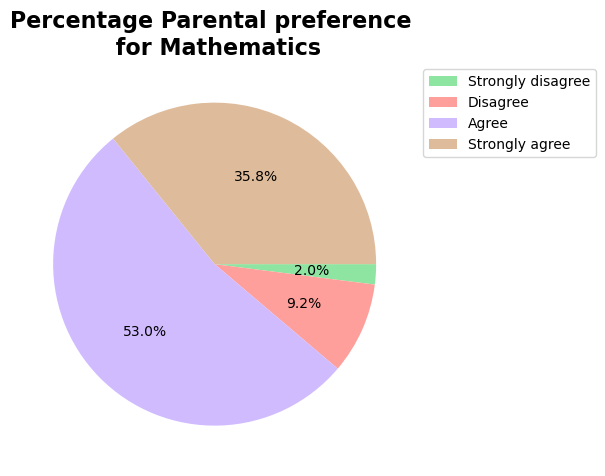

In [468]:
# set plot dimensions
#plt.figure(figsize=[6, 6])
width_in_pixels =900
height_in_pixels =730
dpi = 150
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

# create labels
labels=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']

# reindex the labels
values=pisa_clean['parents_believe_maths_is_important'].value_counts().reindex(labels)

colors = sb.color_palette('pastel')[2:8] # variety of colors
explode = (0.1, 0.1, 0.1, 0.1) # explodes each category from each other

# plot pie
plt.pie(values, colors=colors, counterclock=False, autopct='%1.1f%%'); #shadow=True, explode=explode,
plt.title('Percentage Parental preference \n for Mathematics', fontsize=16, fontweight='bold');
plt.legend(labels, loc='upper left', fontsize=10, bbox_to_anchor=(1,1))

plt.tight_layout() 
# Saving the plot
plt.savefig('math_prefer.jpg', dpi=dpi, bbox_inches='tight')


plt.show();

### Observation

Of the total number of students interviewed, 53.0 percent agree whereas 35.8 strongly agree that their parents believe that mathematics is important for their career.

### Question 4: What is the percentage proportion of students interviewed by grade?

Use bar graph and order the percentages by age.

### Visualization

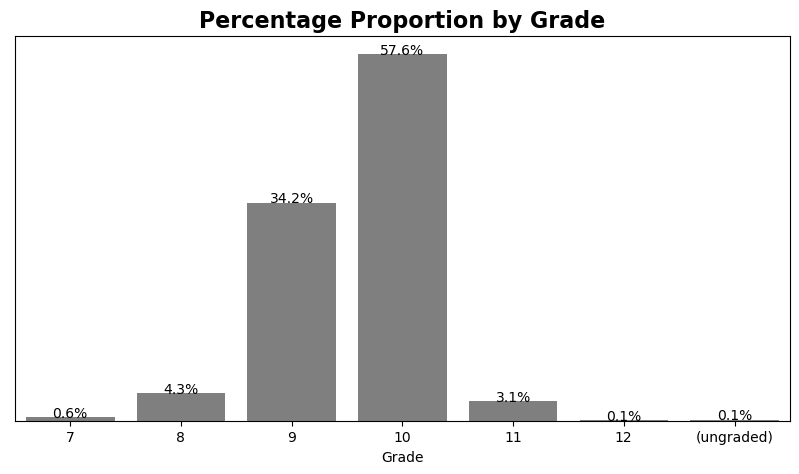

In [469]:
# set plot dimensions
plt.figure(figsize=[10,5])

# Recalculating the grade counts
grade_counts = pisa_clean['international_grade'].value_counts()
# Get the indexes of the Series

# Returns the sum of all not-null values in `type` column
n_pisa = pisa_clean['international_grade'].value_counts().sum()

# plot count plots
sb.countplot(data=pisa_clean, x='international_grade', color=sb.color_palette()[7], order=grade_order);
plt.xlabel('Grade')
plt.title('Percentage Proportion by Grade', fontsize=16, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = grade_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pisa)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

### Observation

There is a greater percentage of students in grade 10 who took part in the pisa test.

### Question 5: What is the percentage proportion for the level of education for the mother?

In this case, I want to use a donut plot to show different categories within the mother education level column.

### Visualization

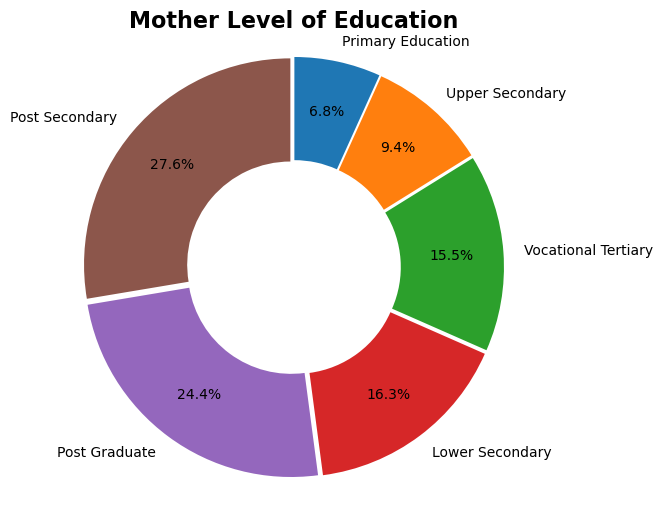

In [470]:
# set plot dimensions
plt.figure(figsize=[6,6])

# drop education values which are None
pisa_edum=pisa_clean.loc[pisa_clean['mother_educational_level']!='None']

# get value counts and sort them
sorted_counts = pisa_edum['mother_educational_level'].value_counts().sort_values()

# explosion
explodes = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

# plot a simple donut plot
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', pctdistance=0.75, explode=explodes,
        startangle = 90, wedgeprops = {'width' : 0.5},counterclock = False)
plt.title('Mother Level of Education', fontsize=16, fontweight='bold')
plt.axis('square')

plt.show();

### Observation

The majority of the mothers had post-secondary and post-graduate education.

### Question 6: What is the percentage proportion for the level of education for the father of students who took pisa test?

Use waffle plot

### Visualization

In [471]:
# drop None values in father level of education column
df=pisa_clean.loc[pisa_clean['father_educational_level']!='None']

# define and creat a function to calculate percentages, count, and create quata
def percentage_blocks(df, var):
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for edu in decimal.index[:rem]:
        counts[edu] += 1

    return counts

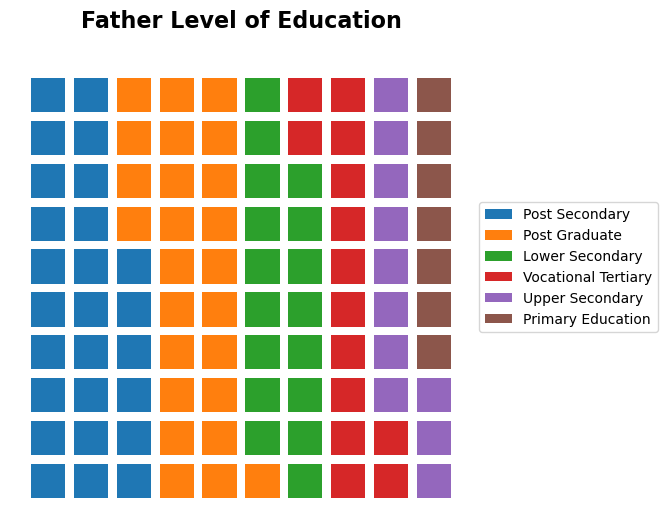

In [472]:
# set plot dimensions
plt.figure(figsize=[6,6])
waffle_counts = percentage_blocks(df, 'father_educational_level')

prev_count = 0

# for each category,
for category in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[category])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    
    plt.bar(x = y, height = 0.8, width = 0.8, bottom = x)
    prev_count += waffle_counts[category]
    
# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.title('Father Level of Education', fontsize=16, fontweight='bold')
plt.axis('off')
plt.axis('square');

### Observation

The majority of the fathers had post-secondary and post-graduate education.

### Question 7: How many students access computers at home and school and use them?

Wrangle pisa_clean to rename the text 'donÂt' for home_desktop_computer and school_desktop_computer 

In [473]:
pisa_clean.loc[pisa_clean['home_desktop_computer'] == "Yes, but I donÂt use it", 'home_desktop_computer'] = "Yes, but I don't use it"
pisa_clean.loc[pisa_clean['school_desktop_computer'] == "Yes, but I donÂt use it", 'school_desktop_computer'] = "Yes, but I don't use it"
pisa_clean.head(5)

,country,oecd,school_id,student_id,international_grade,gender,student_age,perseverance,attitude_towards_school_learning_outcomes,sense_of_belonging_to_school,...,maths_teacher_classroom_management,ICT_at_school,maths_teacher_support,teacher_student_relations,teacher_support,score_in_mathematics,score_in_reading,score_in_science,total_score,date_of_birth
22156,Australia,OECD,1,6,10,Female,16.08,1.7171,0.2818,0.1459,...,-0.4499,0.8574,0.5831,0.7959,0.97,625.96198,655.86582,668.44462,1950.27242,7/1996
22157,Australia,OECD,1,7,11,Female,16.00,1.3116,1.6884,1.6572,...,0.7640,0.2340,2.6379,0.7959,0.97,661.87100,737.91804,768.78030,2168.56934,8/1996
22158,Australia,OECD,1,8,10,Male,16.08,0.7205,2.1880,0.8675,...,1.2923,0.8574,1.1554,1.5296,0.97,639.35974,681.31428,736.42298,2057.09700,7/1996
22159,Australia,OECD,1,9,10,Male,15.67,0.7205,0.6517,0.7509,...,2.1989,1.5045,0.8270,1.0099,1.68,467.52608,517.63730,562.42074,1547.58412,12/1996
22164,Australia,OECD,1,14,10,Female,15.67,-0.3407,0.4410,0.2570,...,0.7640,0.8574,0.5831,0.3536,1.68,589.35194,664.84150,634.31554,1888.50898,12/1996


### Visualization

Use bar graphs

In [474]:
com=pisa_clean[~pisa_clean['home_desktop_computer'].isna()]
com[~com['school_desktop_computer'].isna()]

,country,oecd,school_id,student_id,international_grade,gender,student_age,perseverance,attitude_towards_school_learning_outcomes,sense_of_belonging_to_school,...,maths_teacher_classroom_management,ICT_at_school,maths_teacher_support,teacher_student_relations,teacher_support,score_in_mathematics,score_in_reading,score_in_science,total_score,date_of_birth
22156,Australia,OECD,1,6,10,Female,16.08,1.7171,0.2818,0.1459,...,-0.4499,0.8574,0.5831,0.7959,0.97,625.96198,655.86582,668.44462,1950.27242,7/1996
22157,Australia,OECD,1,7,11,Female,16.00,1.3116,1.6884,1.6572,...,0.7640,0.2340,2.6379,0.7959,0.97,661.87100,737.91804,768.78030,2168.56934,8/1996
22158,Australia,OECD,1,8,10,Male,16.08,0.7205,2.1880,0.8675,...,1.2923,0.8574,1.1554,1.5296,0.97,639.35974,681.31428,736.42298,2057.09700,7/1996
22159,Australia,OECD,1,9,10,Male,15.67,0.7205,0.6517,0.7509,...,2.1989,1.5045,0.8270,1.0099,1.68,467.52608,517.63730,562.42074,1547.58412,12/1996
22164,Australia,OECD,1,14,10,Female,15.67,-0.3407,0.4410,0.2570,...,0.7640,0.8574,0.5831,0.3536,1.68,589.35194,664.84150,634.31554,1888.50898,12/1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475542,Uruguay,Non-OECD,180,5305,10,Female,16.25,3.5286,0.4410,0.3895,...,0.3255,0.5423,0.5831,0.4759,0.11,533.89156,492.63508,489.12720,1515.65384,5/1996
475544,Uruguay,Non-OECD,180,5307,10,Female,15.67,0.0511,-0.0377,0.6458,...,1.2923,1.4368,0.4052,0.3536,1.68,436.13490,451.41038,449.03022,1336.57550,12/1996
475547,Uruguay,Non-OECD,180,5310,10,Male,15.42,-0.3407,-0.0377,-0.2191,...,-0.0784,-0.7538,-0.1687,-0.1113,0.11,446.65058,375.93360,370.88774,1193.47192,3/1997
475549,Uruguay,Non-OECD,180,5312,10,Female,16.00,1.3116,0.1565,-0.1123,...,2.1989,-1.0936,0.2669,0.3536,0.61,469.31766,502.96112,446.79226,1419.07104,8/1996


In [475]:
# Reshape the data to long format
com_melted = com.melt(
    value_vars=['home_desktop_computer', 'school_desktop_computer'],
    var_name='Category',
    value_name='Usage'
)
com_melted.value_counts().reset_index()

,Category,Usage,0
0,home_desktop_computer,"Yes, and I use it",59809
1,school_desktop_computer,"Yes, and I use it",56247
2,school_desktop_computer,"Yes, but I don't use it",19356
3,home_desktop_computer,No,16041
4,school_desktop_computer,No,10742
5,home_desktop_computer,"Yes, but I don't use it",10495


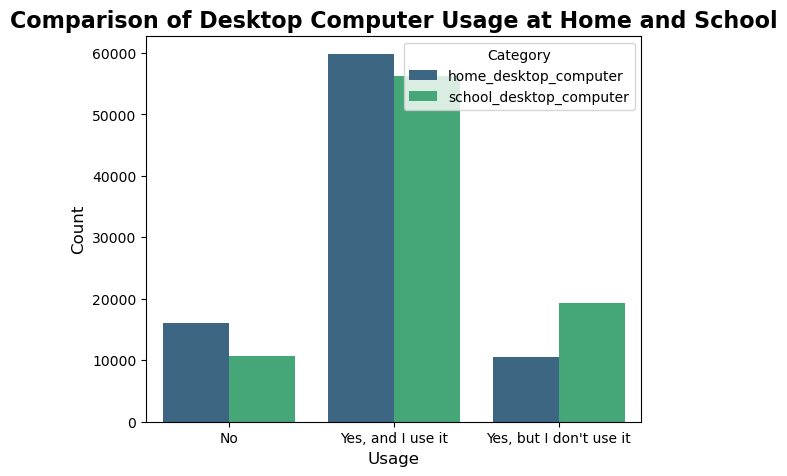

In [476]:
# set plot dimensions
#plt.figure(figsize=[9, 5])
width_in_pixels =900
height_in_pixels =730
dpi = 150
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))
plt.tight_layout() 
# Saving the plot
plt.savefig('math_prefer.jpg', dpi=dpi, bbox_inches='tight')

# create labels
labels=['No', 'Yes, and I use it', 'Yes, but I don\'t use it']

# Create the barplot
sb.barplot(data=com_melted.value_counts().reset_index(), x='Usage', y=0, hue='Category', order=labels, palette='viridis')

# Add labels and title
plt.xlabel('Usage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Comparison of Desktop Computer Usage at Home and School', fontsize=16, fontweight='bold')

plt.tight_layout() 
# Saving the plot
plt.savefig('math_prefer.jpg', dpi=dpi, bbox_inches='tight')

plt.show()

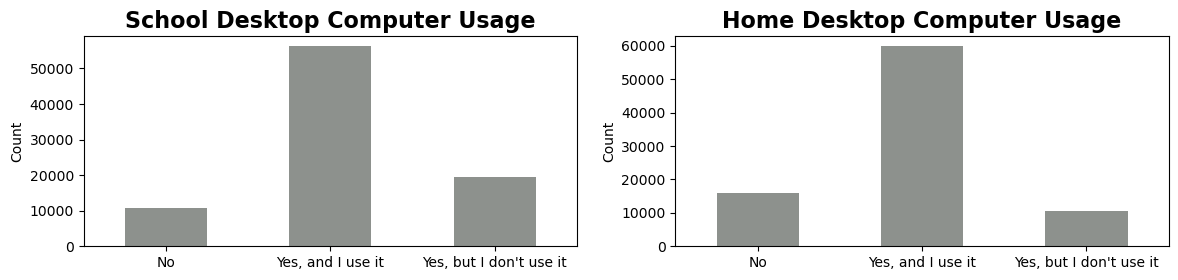

In [477]:
# set plot dimensions
plt.figure(figsize=[14, 6])

plt.subplot(2,2,1)
#plot bar
com['school_desktop_computer'].value_counts().sort_index().plot(kind='bar', color='#8D918D')
plt.title('School Desktop Computer Usage', fontsize=16, fontweight='bold')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(2,2,2)
# plotrbar
com['home_desktop_computer'].value_counts().sort_index().plot(kind='bar', color='#8D918D')
plt.title('Home Desktop Computer Usage', fontsize=16, fontweight='bold')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show();

### Observation

The number of students who access and use computers at school and home exceeds those who access and don't use them as well as those who don't have access to computers at all

### Numeric Variables

In [478]:
# create numrical variables list
numeric_vars_other = ['perseverance',
                'sense_of_belonging_to_school',
                'attitude_towards_school_learning_outcomes',
                'ICT_at_school',
                #'ICT_use_at_school',
                'maths_teacher_support',
                'teacher_student_relations',
                'teacher_support',
                'maths_teacher_classroom_management',    
                'social_economic&cultural_index_status', 
                'home_possessions']

numeric_vars_scores=['score_in_mathematics',
                     'score_in_reading', 
                     'score_in_science',
                     'total_score']

### Question 8: What is the distribution of the scores?

Use histogram to check the distribution, normality or skewness of scores per each subject category as well as total_score.

### Visualization

Create function to plot mathematics, reading, science and total scores and then plot the four histograms

In [479]:
# create function to plot histograms
def hist_plot(col,binsize):
    bins = np.arange(0, pisa_clean[col].max()+binsize, binsize) # create bin sizes
    plt.hist(data=pisa_clean, x = col, color='grey', bins = bins, alpha=0.7) # plot hist
    plt.axvline(x=pisa_clean[col].median(), color='b') # blue line to check for skewness
    plt.ylabel('Student count')

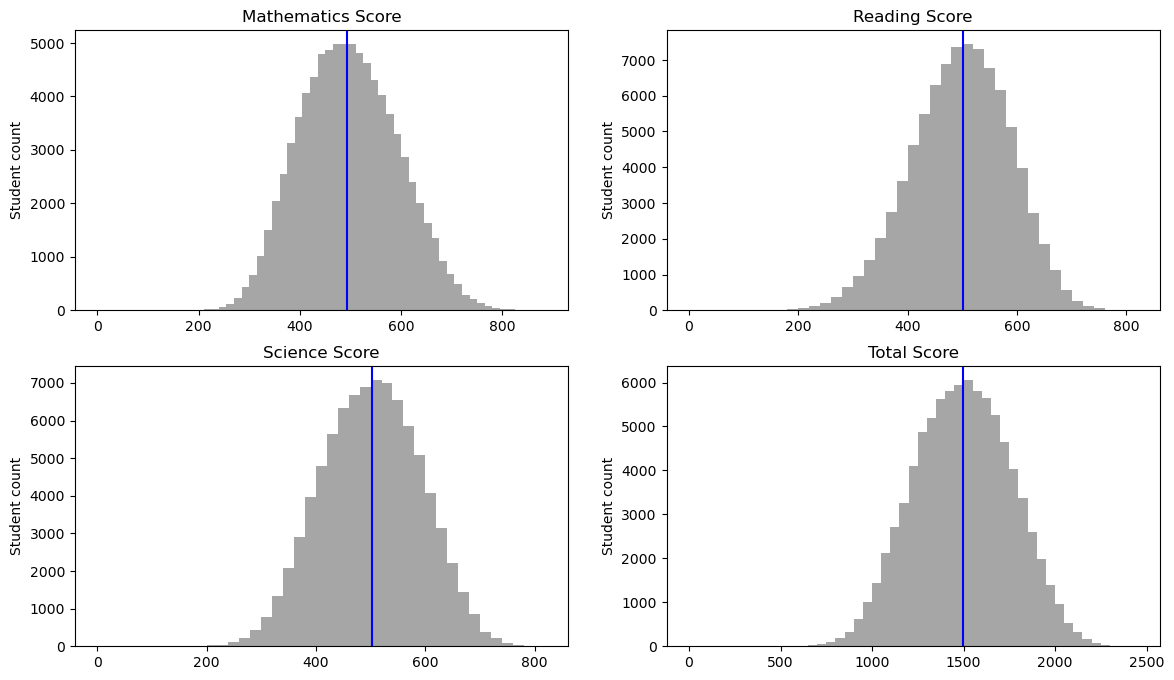

In [480]:
# set plot dimensions
plt.figure(figsize=[14, 8])

# plot the distibutions
# mathematics score distribution  
plt.subplot(2, 2, 1)
hist_plot(col='score_in_mathematics', binsize=15)
txt='Mathematics Score'
plt.title(txt);

# reading score distribution
plt.subplot(2, 2, 2)
hist_plot(col='score_in_reading', binsize=20)
txt='Reading Score'
plt.title(txt);

# science score distribution
plt.subplot(2, 2, 3)
hist_plot(col='score_in_science', binsize=20)
txt='Science Score'
plt.title(txt);

# total score distribution
plt.subplot(2, 2, 4)
hist_plot(col='total_score', binsize=50)
txt='Total Score'
plt.title(txt)

plt.show();

### Observation

All the distributions for the scores are normal

### Question 9: What is the distribution of other numeric variables?

Use box plot to maintain the distribution of quantitative variables in the data.

### Visualization

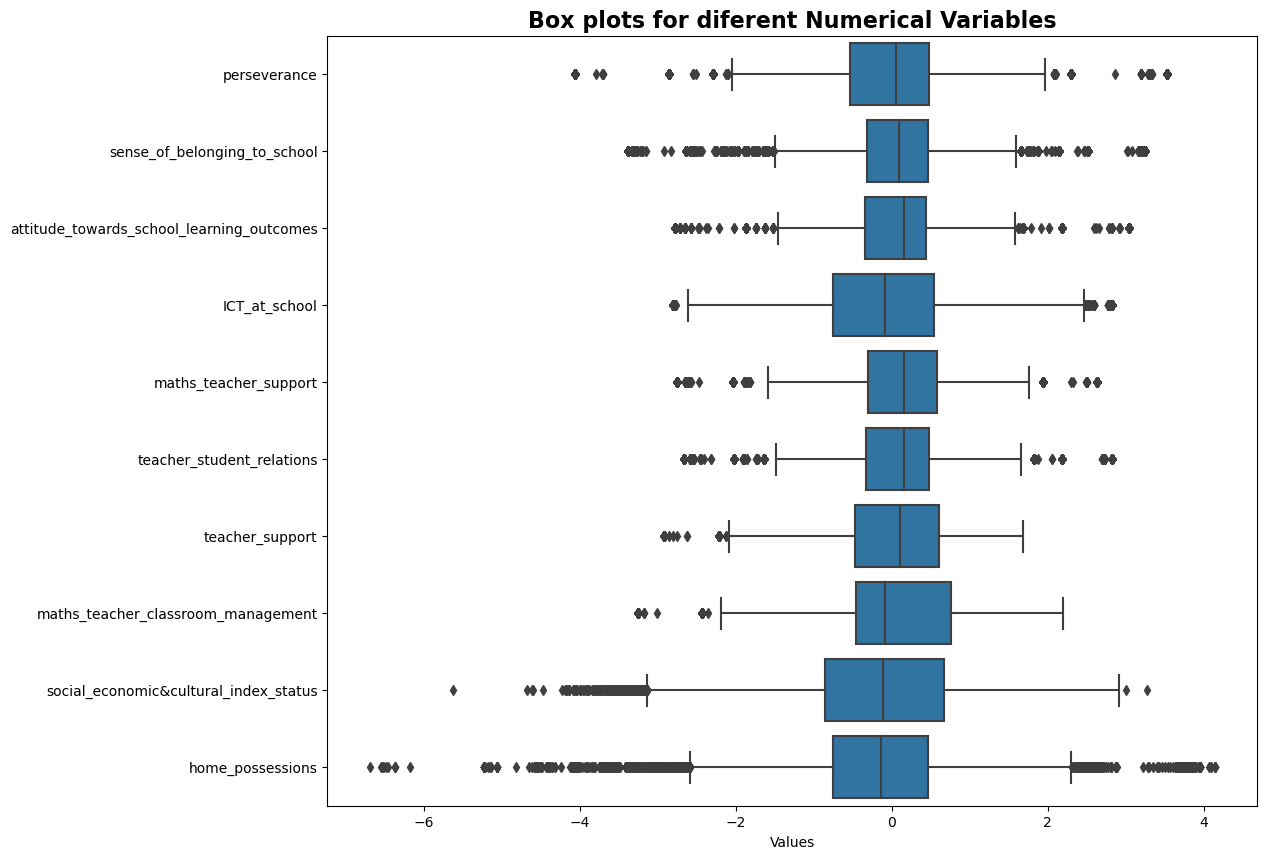

In [481]:
# set plot dimensions
plt.figure(figsize=[12, 10])

# plot box plot
pisa_num=pisa_clean[numeric_vars_other]
sb.boxplot(data=pisa_num,orient="h", color=sb.color_palette()[0])
plt.title('Box plots for diferent Numerical Variables', fontsize=16, fontweight='bold')
plt.xlabel('Values')
#plt.xlim(-5, 4)

plt.show();

### Observation

All the numeric columns have outliers. Whereas most of the features are normally distributed, perserverence, attitude of the students towards the school, ICT used at school, and mathematics teacher classroom management are slightly skewed.

## Discussion

The columns are grouped into two, categorical features and numerical features. 

The categorical variables include country of origin, school and student identification, gender, grade, student age and month and year of birth, use of desktop computers at school and home, parent educational level, and whether parents believe that mathematics is important to their children's careers. The count plots visualizations for the country, grade levels, and gender show that Mexico has the highest number of students interviewed. Most of the students interviewed were female while a greater number of grade 10 level students took part in the Pisa test as compared to other grades. 

The majority of the students access and use a desktop computer at school and home. There is a greater percentage proportion of respondents who agree that their parents believe that mathematics is important for their career. Also, students born after June 1996 are the majority in terms of the percentage proportion of students interviewed by date of birth. For parents' educational levels, the majority of the parents had post-secondary and post-graduate education as shown in the donut chart and waffle counts.

The quantitative variables considered comprise perseverance of the students, sense of belonging to the school, attitude towards the school, use of ICT, teacher support and teacher-student relations, home possessions, socio-economic and cultural status, and subject scores obtained from the plausible values. From the visualization plotted in this case, it is clear that all the features have outliers. Whereas most of the features are normally distributed, perseverance, the attitude of the students towards the school, ICT used at school, and mathematics teacher classroom management are slightly skewed.

Some of the visualizations could not be plotted with the data initially stored and therefore had to be readjusted and changed. For instance, in determining the number of students who took the Pisa test per grade, the grade level 96, had to be removed due to validity issues. Also, for the percentage proportion of students interviewed by date of birth, the column for date of birth has a value of 99, which is not valid. Finally, the donut chart and waffle counts on the percentage proportion for the level of education of the parents were done after the removal of None values.

## Bivariate Exploration

> This section investigates relationships between pairs of variables in the data. The distribution of all the variables under this section has been explored under univariate exploration. Heatmaps, bar plots, regplots, violin plots, and box plots are used in this section.

### Question 10: What is the total number of students who access and use a computer at school and home?

### Visualization

use heatmap to show relationships between the use of home desktop computer and school desktop computer by students.

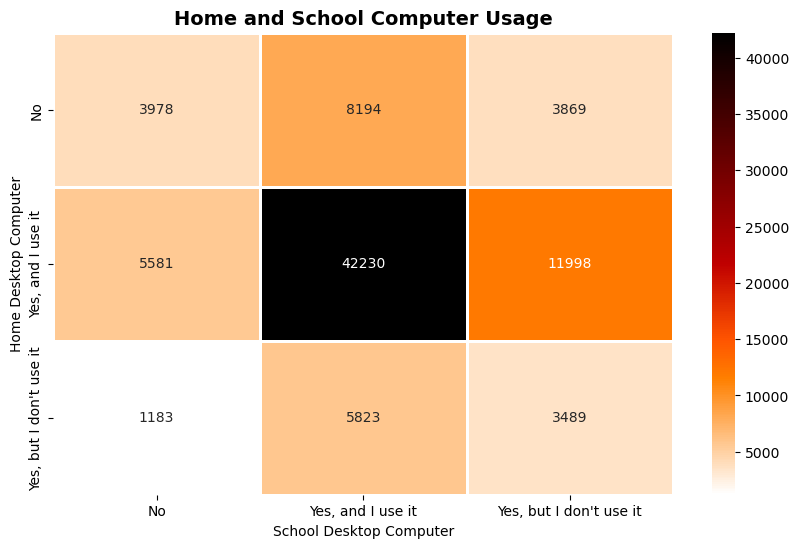

In [482]:
# set plot dimensions
plt.figure(figsize=[10, 6])

# make counts for home desktop computer and school desktop computer
com_counts = pisa_clean.groupby(['home_desktop_computer', 'school_desktop_computer']).size()
com_counts = com_counts.reset_index(name='count')
com_counts = com_counts.pivot(index = 'home_desktop_computer', columns = 'school_desktop_computer', values = 'count')
# plot heatmap
sb.heatmap(com_counts, linewidth = 1, cmap='gist_heat_r', annot = True, fmt = 'd')
plt.title('Home and School Computer Usage', fontsize=14, fontweight='bold')
plt.xlabel('School Desktop Computer')
plt.ylabel('Home Desktop Computer')

plt.show();

### Observation

The number of students who access and use computers is 42043, which is higher than those who don't use a computer at home whether they access the computers or not.

### Question 11: What is the proportion in terms of gender, access and use desktop computers at school?

## Visualization

Use heatmap

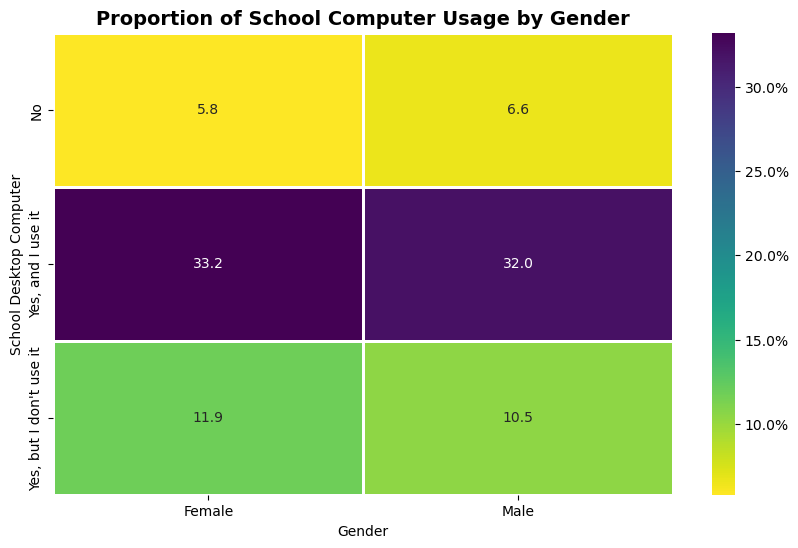

In [483]:
# set plot dimensions
plt.figure(figsize=[10, 6])

#pisa_n=pisa_clean.dropna(axis=0)
cg_count = com.groupby(['school_desktop_computer', 'gender']).size()
cg_counts=cg_count*100/(pisa_clean['gender'].count())

cg_counts = cg_counts.reset_index(name='count')
cg_counts = cg_counts.pivot(index = 'school_desktop_computer', columns = 'gender', values = 'count')
# plot heatmap
sb.heatmap(cg_counts, linewidth = 1, cmap='viridis_r', annot = True, fmt = '0.1f', cbar_kws={'format': '%.1f%%'})
plt.title('Proportion of School Computer Usage by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('School Desktop Computer')

plt.show();

### Observation

About 33 percent of female students access and use desktop computers at school compared to 32 percent of male students.

### Question 12: What is the proportion in terms of age, access and use desktop computers at home?

### Visualization

Use heatmap

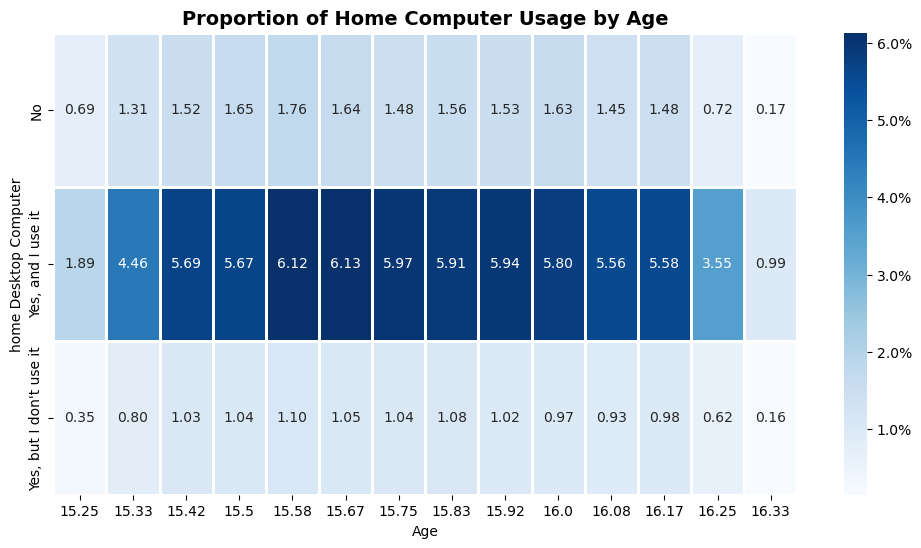

In [484]:
# set plot dimensions
plt.figure(figsize=[12, 6])

cage_count = com.groupby(['home_desktop_computer', 'student_age']).size()
cage_counts=cage_count *100/(pisa_clean['student_age'].count())
cage_counts = cage_counts.reset_index(name='count')
cage_counts = cage_counts.pivot(index = 'home_desktop_computer', columns = 'student_age', values = 'count')
sb.heatmap(cage_counts, linewidth = 1, cmap='Blues', annot = True, fmt = '0.2f', cbar_kws={'format': '%.1f%%'})
plt.title('Proportion of Home Computer Usage by Age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('home Desktop Computer')

plt.show();

### Observation

The majority of students, about 6.1 percent who use a desktop computer at home were born between July and Agust 1996.

### Question 13: Is there differences in perfomance based on gender or between OECD and non-OECD?

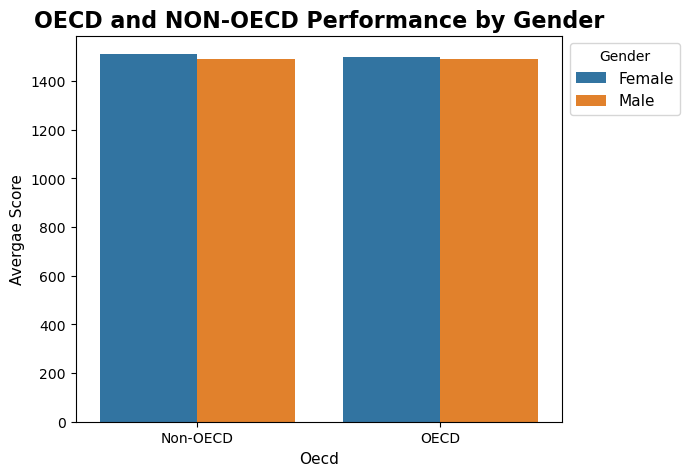

In [485]:

# Data
pisa_mean=pisa_clean.groupby(['gender', 'oecd'])['total_score'].mean().reset_index().sort_values(by='total_score', ascending=False) 

width_in_pixels =1050
height_in_pixels =730
dpi = 150
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

sb.barplot(data=pisa_mean, y='total_score', x='oecd', hue='gender')
plt.title('OECD and NON-OECD Performance by Gender', fontsize=16, fontweight='bold')
plt.ylabel('Avergae Score', fontsize=11)
plt.xlabel('Oecd', fontsize=11)
plt.legend(title='Gender', fontsize=11, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout() 
# Saving the plot
plt.savefig('oecd_performance.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

There is no significant different in performance in average total score between OECD and Non-OECD. However, female performance was superior to male students.

### Question 14: Is there differences in perfomance based on the country of origin?

### Visualization

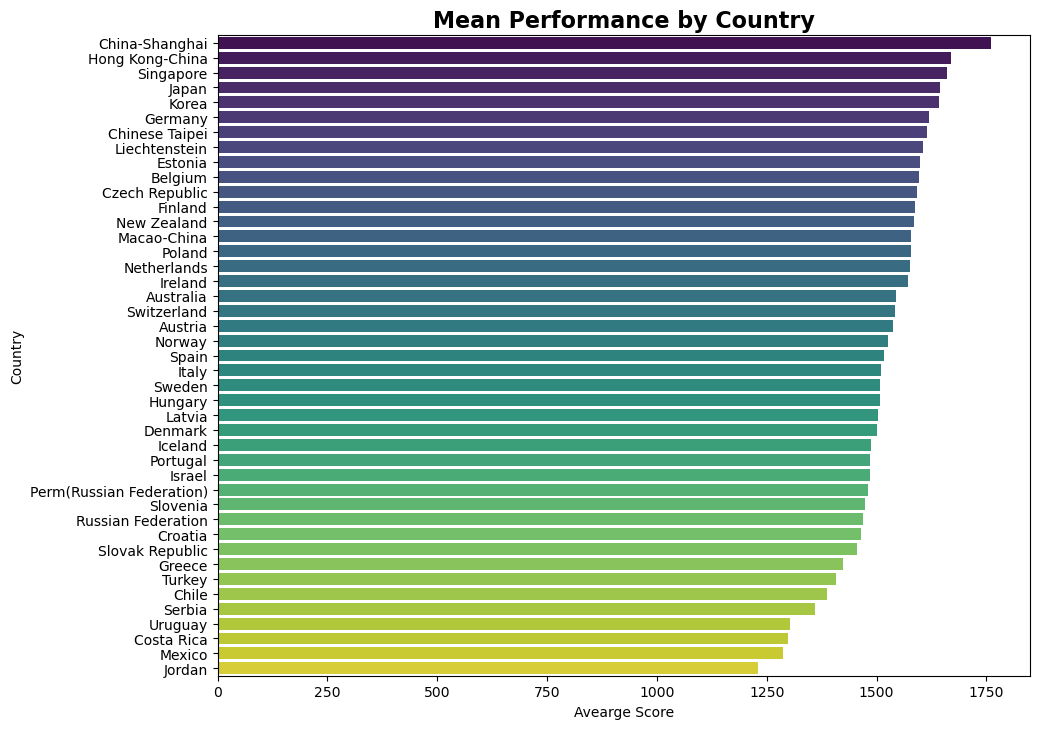

In [486]:
# set plot dimensions
#plt.figure(figsize=[8, 6])
width_in_pixels =1050
height_in_pixels =740
dpi = 100
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

pisa_mean=com.groupby('country')['total_score'].mean().sort_values(ascending=False)
x=pisa_mean.values
y=pisa_mean.index

sb.barplot(data=pisa_clean, y=y, x=x, palette='viridis')
plt.title('Mean Performance by Country', fontsize=16, fontweight='bold')
plt.ylabel('Country')
plt.xlabel('Avearge Score')

plt.tight_layout() 
# Saving the plot
plt.savefig('country-perfomance.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

China_Shanghai has the best perfomance

### Question 15: What factors contribute to higher perfomance?

This question seeks to examine the relationships between the numerical variables, and investigate factors that have a positive influence on student performance among different regional countries that are either OECD or Non-OECD members.

**Wrangle the data** 


Check the correction among the quantitative features

### Visualization

Use heatmap to show correlations

In [487]:
lst=numeric_vars_other.copy()

In [488]:
labels=['total score',
        'perseverance',
        'sense of \n belonging \n to school',
        'attitude \n towards school \n learning \n outcomes',
        'ICT at \n school',
        'maths teacher \n support',
        'teacher student \n relations',
        'teacher \n support',
        'maths teacher \n classroom \n management',
        'social_economic \n &cultural \n indexstatus',
        'home \n possessions']

In [489]:
num_cols=['total_score']

for item in lst:
    num_cols.append(item)

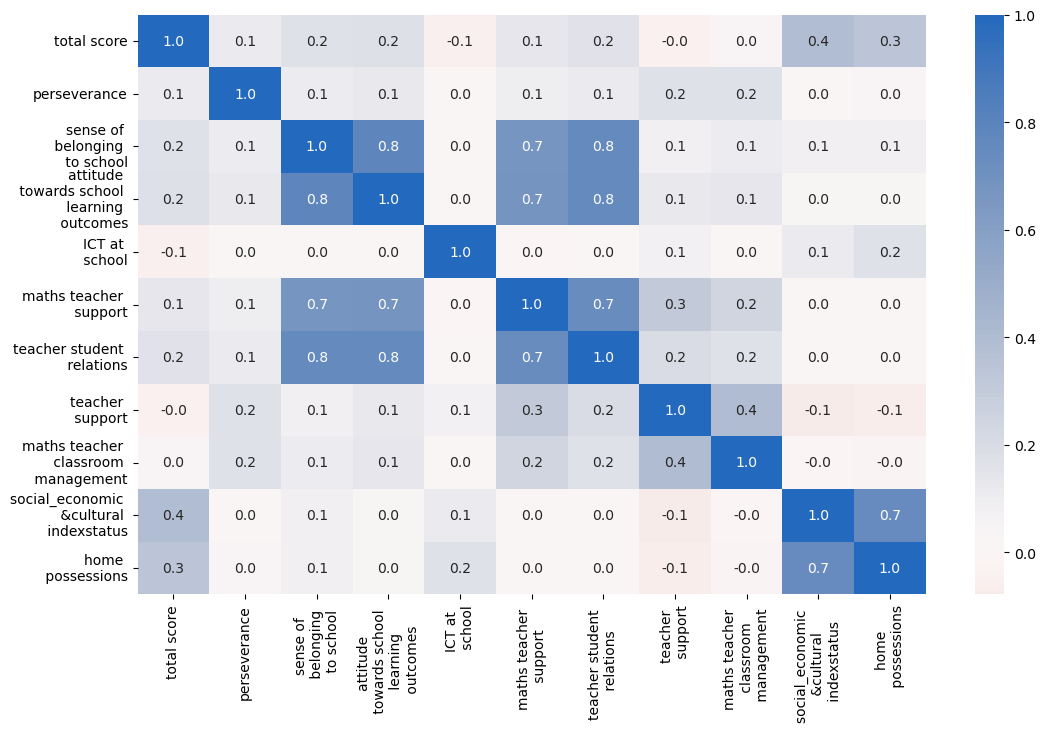

In [490]:
# Data
pisa_heat=pisa_clean[num_cols]
width_in_pixels =1200
height_in_pixels =780
dpi = 105
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

# correlation plot
sb.heatmap(pisa_heat.corr(), annot = True, fmt = '.1f', cmap = 'vlag_r', center = 0, xticklabels=labels, yticklabels=labels)
#plt.xticks(ticks=np.arange(-0.1, 0.3, step=0.1), labels=labels)
plt.tight_layout() 
# Saving the plot
plt.savefig('corr_heat.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

From the correlation matrix visual shown, most features have a positive correlation with each other.

In [491]:
data=pisa_clean.copy()
score='total_score'
numeric_vars = ['perseverance',
                'sense_of_belonging_to_school',
                'teacher_student_relations',
                'teacher_support',
                'home_possessions'
                ]

data_samp = data.groupby(numeric_vars)[score].mean()
data_samp.reset_index()

,perseverance,sense_of_belonging_to_school,teacher_student_relations,teacher_support,home_possessions,total_score
0,-4.0530,-3.3731,-2.6658,-1.53,0.71,1271.22430
1,-4.0530,-3.3731,-2.6658,-1.06,-1.69,1460.32248
2,-4.0530,-3.3731,-2.6658,-1.06,0.26,1558.61180
3,-4.0530,-3.3731,-2.6658,-0.86,-1.18,1407.49258
4,-4.0530,-3.3731,-2.6658,-0.09,-0.88,1517.46278
...,...,...,...,...,...,...
85665,3.5286,3.2554,2.8211,1.68,0.57,1324.07296
85666,3.5286,3.2554,2.8211,1.68,0.60,1325.80964
85667,3.5286,3.2554,2.8211,1.68,0.79,1685.51390
85668,3.5286,3.2554,2.8211,1.68,1.57,1466.55066


In [492]:
data=pisa_clean.copy()

In [493]:
score='total_score'
numeric_vars = ['perseverance',
                'sense_of_belonging_to_school',
                'teacher_student_relations',
                'teacher_support',
                'home_possessions',
                score]
data[numeric_vars]
data['score']=np.log(data['total_score'])

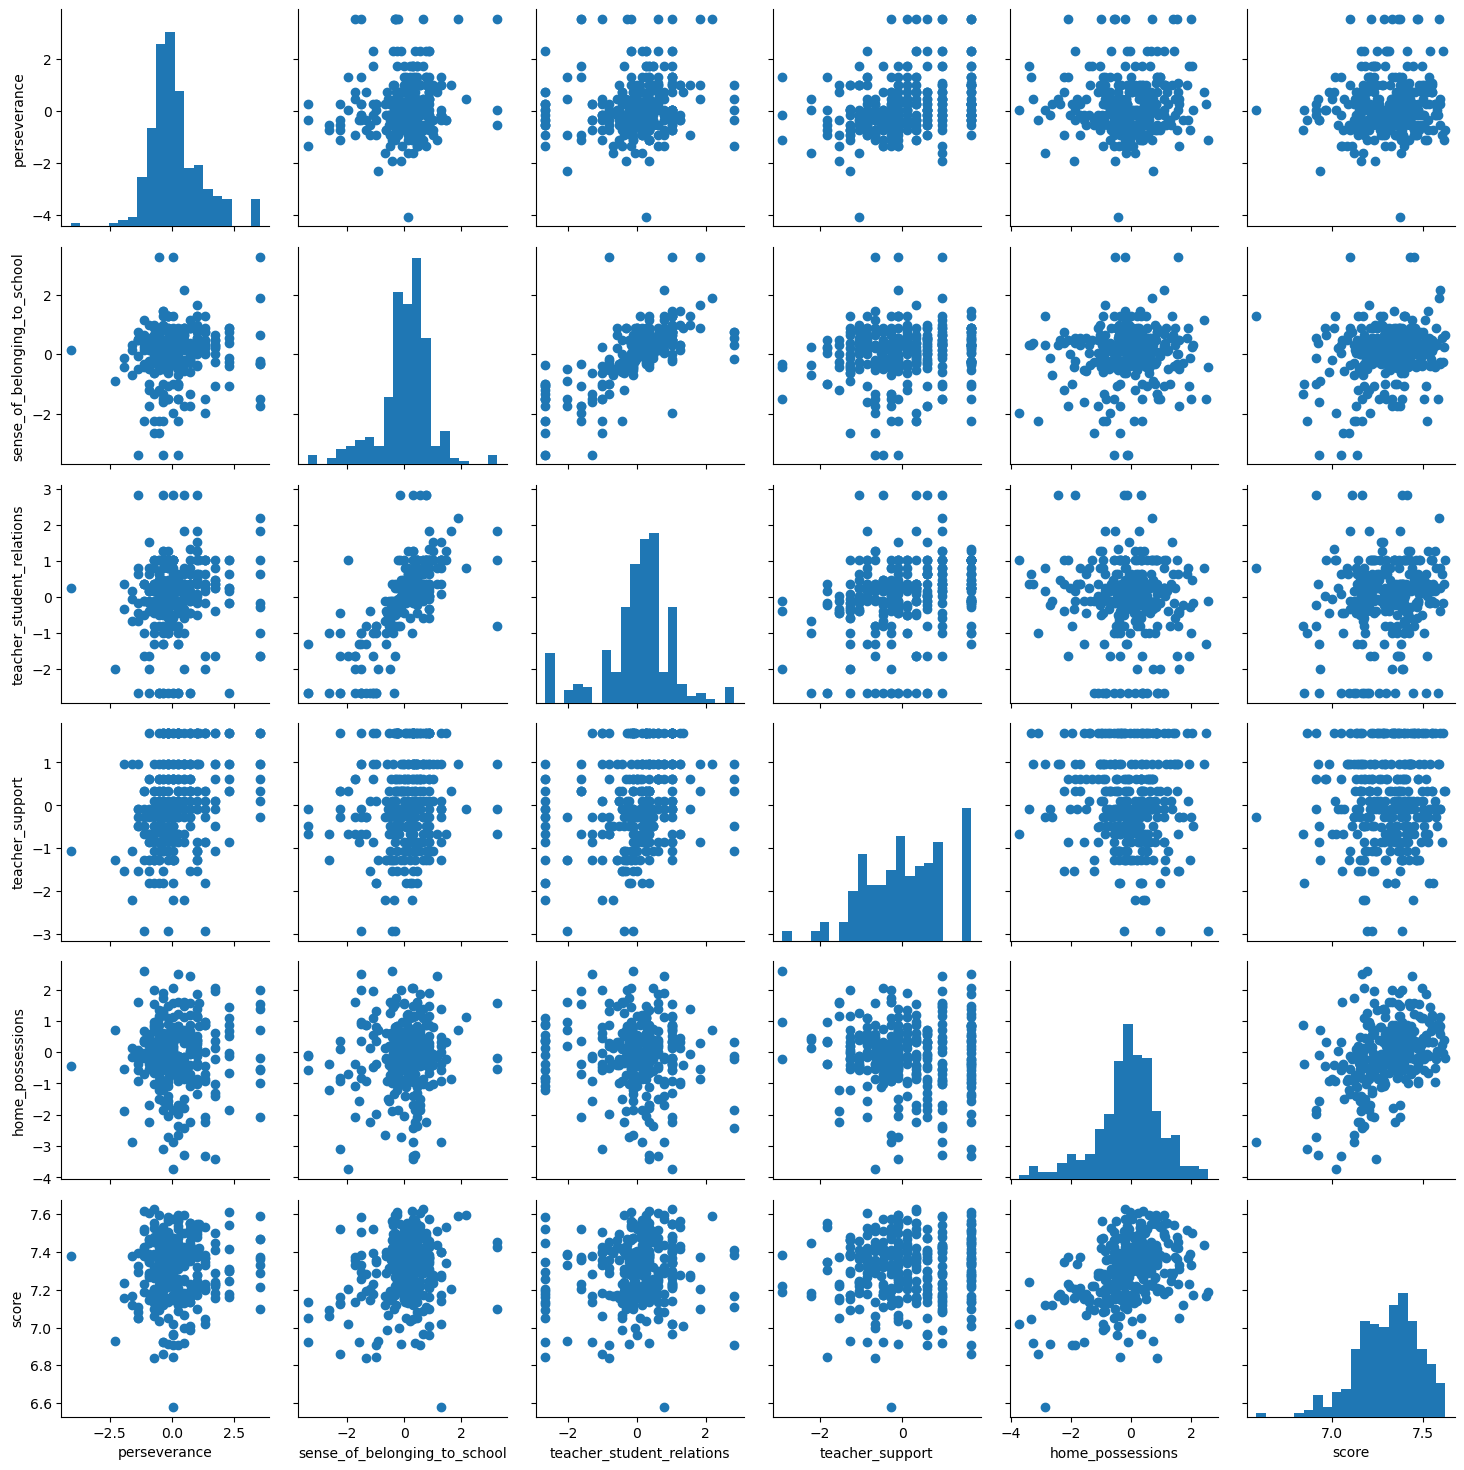

In [494]:
# plot matrix: sample 200 pisa data so that plots are clearer and they render faster

#score='total_score'
numeric_vars = ['perseverance',
                'sense_of_belonging_to_school',
                'teacher_student_relations',
                'teacher_support',
                'home_possessions',
                'score']

data_samp = data.groupby(numeric_vars).mean().reset_index().sample(300)#.sample(n=200, replace = False)
g = sb.PairGrid(data = data_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)

plt.show();  

### Observation

Most of the data concentrate around zero, further investigation will reveal more detail about this trend.

Filter observations from OECD, where students access and use desktop computers and have positive teacher support.

**_Countries by region_**

#western_europe=['Austria','Belgium' ,'France','Germany','Liechtenstein','Luxembourg','Netherlands', 'Switzerland']

#northern_europe=['Denmark','Estonia','Finland','Iceland','Ireland','Latvia','Lithuania','Norway','Sweden','United Kingdom']

#transcontinental_countries=['Kazakhstan','Russian Federation','Turkey'] 

#east_asia=['China-Shanghai', 'Chinese Taipei', 'Macao-China', 'Hong Kong-China', 'Japan']

#north_america_subregion=['Canada', 'Mexico', 'United States of America']

https://www.worldatlas.com/articles/how-many-countries-are-in-europe.html

In [495]:
# ccreate subregions for the countries
transcontinental_countries=['Kazakhstan','Russian Federation','Turkey']
northern_europe=['Denmark','Estonia','Finland','Iceland','Ireland','Latvia','Lithuania','Norway','Sweden','United Kingdom']
north_america_subregion=['Canada', 'Mexico', 'United States of America']
western_europe=['Austria','Belgium' ,'France','Germany','Liechtenstein','Luxembourg','Netherlands', 'Switzerland']
east_asia=['China-Shanghai', 'Chinese Taipei', 'Macao-China', 'Hong Kong-China', 'Japan']

In [508]:
region = {
    'transcontinental_countries': ['Kazakhstan', 'Russian Federation', 'Turkey', 'Perm(Russian Federation)'],
    'northern_europe': ['Denmark', 'Estonia', 'Finland', 'Iceland', 'Ireland', 'Latvia', 'Norway', 'Sweden', 'United Kingdom'],
    'north_america_subregion': ['Canada', 'Mexico', 'United States of America'],
    'western_europe': ['Austria', 'Belgium', 'France', 'Germany', 'Liechtenstein', 'Luxembourg', 'Netherlands', 'Switzerland'],
    'east_asia': ['China-Shanghai', 'Chinese Taipei', 'Macao-China', 'Hong Kong-China', 'Japan', 'Korea', 'Singapore'],
    'southern_europe': ['Greece', 'Italy', 'Portugal', 'Spain'],
    'eastern_europe': ['Czech Republic', 'Hungary', 'Poland', 'Slovak Republic', 'Slovenia', 'Croatia', 'Serbia'],
    'oceania': ['Australia', 'New Zealand'],
    'latin_america': ['Chile', 'Costa Rica', 'Uruguay'],
    'middle_east': ['Israel', 'Jordan']
}

In [516]:
# Copy
pisa_clean['country'] = pisa_clean['country'].str.strip()
pisa_region=pisa_clean.copy()
# Create a reverse mapping of country to region
country_to_region = {country: region_name for region_name, countries in region.items() for country in countries}

# Add the region column to pisa_clean
pisa_region['region'] = pisa_region['country'].map(country_to_region).fillna('Unknown Region')

pisa_region

,country,oecd,school_id,student_id,international_grade,gender,student_age,perseverance,attitude_towards_school_learning_outcomes,sense_of_belonging_to_school,...,ICT_at_school,maths_teacher_support,teacher_student_relations,teacher_support,score_in_mathematics,score_in_reading,score_in_science,total_score,date_of_birth,region
22156,Australia,OECD,1,6,10,Female,16.08,1.7171,0.2818,0.1459,...,0.8574,0.5831,0.7959,0.97,625.96198,655.86582,668.44462,1950.27242,7/1996,oceania
22157,Australia,OECD,1,7,11,Female,16.00,1.3116,1.6884,1.6572,...,0.2340,2.6379,0.7959,0.97,661.87100,737.91804,768.78030,2168.56934,8/1996,oceania
22158,Australia,OECD,1,8,10,Male,16.08,0.7205,2.1880,0.8675,...,0.8574,1.1554,1.5296,0.97,639.35974,681.31428,736.42298,2057.09700,7/1996,oceania
22159,Australia,OECD,1,9,10,Male,15.67,0.7205,0.6517,0.7509,...,1.5045,0.8270,1.0099,1.68,467.52608,517.63730,562.42074,1547.58412,12/1996,oceania
22164,Australia,OECD,1,14,10,Female,15.67,-0.3407,0.4410,0.2570,...,0.8574,0.5831,0.3536,1.68,589.35194,664.84150,634.31554,1888.50898,12/1996,oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475542,Uruguay,Non-OECD,180,5305,10,Female,16.25,3.5286,0.4410,0.3895,...,0.5423,0.5831,0.4759,0.11,533.89156,492.63508,489.12720,1515.65384,5/1996,latin_america
475544,Uruguay,Non-OECD,180,5307,10,Female,15.67,0.0511,-0.0377,0.6458,...,1.4368,0.4052,0.3536,1.68,436.13490,451.41038,449.03022,1336.57550,12/1996,latin_america
475547,Uruguay,Non-OECD,180,5310,10,Male,15.42,-0.3407,-0.0377,-0.2191,...,-0.7538,-0.1687,-0.1113,0.11,446.65058,375.93360,370.88774,1193.47192,3/1997,latin_america
475549,Uruguay,Non-OECD,180,5312,10,Female,16.00,1.3116,0.1565,-0.1123,...,-1.0936,0.2669,0.3536,0.61,469.31766,502.96112,446.79226,1419.07104,8/1996,latin_america


In [ ]:
pisa_scatter=pisa_region.groupby('region', 'country')['total_score'].mean()
pisa_scatter

In [406]:
# pisa above avergae perfomance students
def data_df(region:
    #filter regional data
    pisa_clean.loc[pisa_clean['country']. isin (region)]
    # filter OECD, use of desktop computer at school and positive teacer support
    subregion=pisa_clean#.loc[(pisa_clean['oecd']=='OECD') & (pisa_clean['school_desktop_computer']=="Yes, and I use it") & 
                             #(pisa_clean['teacher_support']>=0)]
    return subregion

ValueError: No axis named country for object type DataFrame

#### Factor 1: Social-Cultural and Economic status

### Visualization

In [ ]:
# data for transcontinental_countries oecd countries
t_countries=data_df(region=transcontinental_countries)
t_countries=t_countries.groupby('social_economic&cultural_index_status')['total_score'].mean().reset_index()
t_countries

In [ ]:
# set plot dimensions
#plt.figure(figsize=[14, 6])
width_in_pixels =1050
height_in_pixels =736
dpi = 150
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

# plot scatter
sb.regplot(data = t_countries, x = 'social_economic&cultural_index_status', y = 'total_score', 
           truncate=False, scatter_kws={'s':1}, line_kws={'color':'orange'})

plt.title('Socio-Economic and Cultural status vs. Score in \n Transcontinental Region', fontsize=15, fontweight='bold')
plt.ylabel('Average Score')
plt.xlabel('Socio-Economic and Cultural status index')    
#plt.xlim(-2,2)
plt.tight_layout() 
# Saving the plot
plt.savefig('social_vs_trans_region.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

From the visualization above, it is clear that there is a linear positive relationship between student scores and social, economic, and cultural status. Positive social-cultural and economic status have a positive impact on student performance among OECD countries in the transcontinental region.

#### Factor 2: Perseverance

### Visualization

In [ ]:
# data for countries in northern europe
n_europe=data_df(region=northern_europe)
n_europe=n_europe.groupby('perseverance')['total_score'].mean().reset_index()
n_europe

In [ ]:
# set plot dimensions
plt.figure(figsize=[14, 6])

sb.regplot(data = n_europe, x = 'perseverance', y = 'total_score', 
           truncate=False, scatter_kws={'s':1}, line_kws={'color':'orange'})
plt.title('Perserverence vs. Students Perfomance in Northern Europe', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Perserverence')
#plt.xlim(-2, 2)
plt.yscale('log')

plt.show();

### Observation

There is a slight positive relationship between student scores and perseverance among countries in Northern Europe, though a lot of data seem to concentrate at zero suggesting that perseverance might not be a major factor for higher scores in this region.

#### Factor 3: Teacher and student relations

### Visualization

In [ ]:
# data for countries in northern europe
n_america=data_df(region=north_america_subregion)
n_america=n_america.groupby('teacher_student_relations')['total_score'].mean().reset_index()
n_america

In [ ]:
# set plot dimensions
#plt.figure(figsize=[14, 6])
width_in_pixels =1050
height_in_pixels =736
dpi = 150
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

sb.regplot(data = n_america, x = 'teacher_student_relations', y = 'total_score', 
           truncate=False, scatter_kws={'s':1}, line_kws={'color':'orange'})
plt.title('Teacher-Student Relations vs. Score in \n North America Region', fontsize=15, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Teacher-Student Relations')

plt.tight_layout() 
# Saving the plot
plt.savefig('relation_vs_score.jpg', dpi=dpi, bbox_inches='tight')


plt.show();

### Observation

A lot of data concentrates from zero to 1, suggesting that positive relations between students and teachers impact positively on the student scores in North American countries, which are members of OECD.

#### Factor 4: Home Possessions

### Visualization

In [ ]:
# data for counties in western europe
w_europe=data_df(region=western_europe)
w_europe=w_europe.groupby('home_possessions')['total_score'].mean().reset_index()
w_europe

In [ ]:
# set plot dimensions
#plt.figure(figsize=[14, 6])
width_in_pixels =1050
height_in_pixels =736
dpi = 150
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

# plot regplot
sb.regplot(data = w_europe, x = 'home_possessions', y = 'total_score', 
           truncate=False, scatter_kws={'s':1}, line_kws={'color':'orange'})
plt.title('Home Possessions vs. Score in \n Western Europe', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Home Possessions')
plt.tight_layout() 
# Saving the plot
plt.savefig('posession_score_in_WE.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

There is a linear positive relationship between student scores and home possessions. Positive home possessions have a positive impact on student performance among OECD countries in Western Europe.

#### Factor 5: Students sense of belonging to school

### Visualization

In [ ]:
# data for east asia
e_asia=data_df(region=east_asia)
e_asia=e_asia.groupby('sense_of_belonging_to_school')['total_score'].mean().reset_index()
e_asia

In [ ]:
# set plot dimensions
plt.figure(figsize=[14, 6])
width_in_pixels =1050
height_in_pixels =736
dpi = 150
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))


sb.regplot(data = e_asia, x = 'sense_of_belonging_to_school', y = 'total_score', 
           truncate=False, scatter_kws={'s':1}, line_kws={'color':'orange'})
plt.title('Sense of belonging to school vs. Score in \n Eastern Asia', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Students sense of belonging to school')
plt.tight_layout() 
# Saving the plot
plt.savefig('sense_WA.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

A lot of data concentrates from zero to 1, suggesting that student positive feelings about their school impact positively on their scores in East Asia countries, which are members of OECD.

#### Factor 6: ICT usage at school

In this case, I want to consider ICT usage in all Non-OECD, which participated in the pisa2012 test.

### Visualization

In [ ]:
# pisa non oecd data
df=pisa_clean.loc[(pisa_clean['oecd']=='Non-OECD') & (pisa_clean['school_desktop_computer']=="Yes, and I use it")]# & 
                             #(pisa_clean['teacher_support']<0)]
df=df.groupby('ICT_at_school')['total_score'].mean().reset_index()
df

In [ ]:
# set plot dimensions
plt.figure(figsize=[14, 6])

# plot regplot
sb.regplot(data = df, x = 'ICT_at_school', y = 'total_score', 
           truncate=False, scatter_kws={'s':1}, line_kws={'color':'orange'})

plt.title('Use of ICT vs. Students Perfomance', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('ICT usage')

plt.show();

### Observation

There is a slight linear negative relationship between student scores and student usage of ICT at school within Non-OECD states.

### Question 16: Does teachers' support has a positive impact on students' scores?

### Visualization

In [ ]:
ts=pisa_clean.groupby('teacher_support')['total_score'].mean().reset_index()
ts

In [ ]:
# set plot dimensions
plt.figure(figsize=[10, 7])

# plot heatmap
plt.hist2d(data = ts, x = 'teacher_support', y = 'total_score', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.title('Teacher support vs. Students Perfomance', fontsize=16, fontweight='bold')
plt.xlabel('teacher support')
plt.ylabel('Score')

plt.show();

### Observation

A lot of data concentrates from zero to about 0.8, suggesting that positive teacher support impacts positively on students' scores.

### Question 17: Does classroom management have a positive impact on students' scores in mathematics?

### Visualization

In [ ]:
mat_cm=pisa_clean.groupby('maths_teacher_classroom_management')['score_in_mathematics'].mean().reset_index()
mat_cm

In [ ]:
# set plot dimensions
plt.figure(figsize=[10, 7])
width_in_pixels =900
height_in_pixels =730
dpi = 150
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))
plt.tight_layout() 
# Saving the plot
plt.savefig('math_prefer.jpg', dpi=dpi, bbox_inches='tight')

# plot heatmap
plt.hist2d(data = mat_cm, x = 'maths_teacher_classroom_management', 
           y = 'score_in_mathematics', cmin=0.5, cmap='vlag_r')
plt.colorbar()
plt.title('Mathematics Teacher support vs. Students Perfomance', fontsize=16, fontweight='bold')
plt.xlabel('Mathematics teacher support')
plt.ylabel('Mathematics score')

plt.show();

### Observation

A lot of data concentrates below zero upto -0.5, suggesting that classroom management has little or no significant positive impact on students' mathematics scores.

### Question 18: Is there any difference in performance distribution between OECD and Non-OECD countries?

### Visualization

Use box plot

In [ ]:
# set plot dimensions
plt.figure(figsize = [7, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=pisa_clean, x='oecd', y='total_score', color=base_color)
plt.title('Performance Distribution for OECD and Non-OECD', fontsize=16, fontweight='bold')
plt.ylabel('Score')

plt.show();

### Observation

The median performance is the same in both OECD and Non-OECD countries. Many students scored between 25% and 75% scores in Non-OECD than in OECD countries.

### Question 19: Is there any difference in performance distribution female and male students?

### Visualization

Use violin plot

In [ ]:
# set plot dimensions
plt.figure(figsize=[7,5])

base_color = sb.color_palette()[0]
# violin plot
sb.violinplot(data=df, x='gender', y='total_score', color=base_color, inner=None) # none removes boxplot
plt.title('Perfomance Distribution for Gender', fontsize=16, fontweight='bold')
plt.ylabel('Score')

plt.show();

### Observation

Female students who scored about 1500, are more than male students.

### Question 20: Is there any relationship between mother educational level and home possessions?

### Visualization

Use point plot

In [ ]:
# set plot dimensions
plt.figure(figsize=[12,5])

# drop none
pisa_mother=pisa_clean.loc[pisa_clean['mother_educational_level'] !='None']
edu_order = ['Primary Education', 'Lower Secondary', 'Upper Secondary', 'Post Secondary', 
             'Vocational Tertiary', 'Post Graduate']
sb.pointplot(data=pisa_mother, x='mother_educational_level', y='home_possessions', 
             color=base_color, 
            errorbar='sd', order=edu_order) 
plt.title('Educational level vs. Home possessions', fontsize=16, fontweight='bold')
plt.ylabel('Home Possession Score')

plt.show();

### Observation

Lower education level imply low score for home possession

## Discussion

Like in the previous exploration, I consider the relationship among the categorical features, numeric features, and between categorical and numeric variables. 

For the main features of interest, the project seeks to investigate how different factors influence performance among students in different regions, which are either members of OECD or Non-OECD. From the visualization created, it is clear that there is a linear positive relationship between student scores and social, economic, and cultural status. Positive social-cultural and economic status have a positive impact on student performance among OECD countries in the transcontinental region. Another factor that influences scores is perseverance. Student scores among countries in Northern Europe seem to concentrate at zero suggesting that perseverance might not be a major factor for higher scores in this region even though the graph shows a slight linear trend. it is also evident that positive home possessions have a positive impact on student performance among OECD countries in Western Europe as shown by the linear positive relationship between student scores and home possessions. In addition, teacher-student relations and student sense of belonging to school also influence students' scores in certain regions. This is because, a lot of data tend to concentrate from zero to 1, which may suggest that positive relations between students and teachers, and teachers' support have a slight influence on positive student scores.

Other features considered are gender, use of desktop computers at school, home possessions, and education level of parents among members of OECD and Non-members. The number of students who access and use computers is 42043, which is higher than those who don't use a computer at home whether they access the computers or not. In the case of gender, about 33 percent of female students access and use desktop computers at school compared to 32 percent of male students. comparing home possessions and parent level of education, it is clear from the visualization that a lower education level implies a low score for home possession. lastly, the median performance is the same in both OECD and Non-OECD countries, though many students scored between 25% and 75% scores in non-OECD than in OECD countries. however, it is important to note that, there is no significant difference in performance among females and males as well as between OECD and non-OECD.

## Multivariate Exploration

> In this section, plots of three or more variables have been created to investigate further the previous findings. Several plots such as implot, stripplot, box plot, factor plot, point plot, and facetgrid have been used.

### Question 21: Is there any difference i performance between gender and grade?

### Visualization

Use box plot

In [ ]:
# set plot dimensions
plt.figure(figsize=[12,5])

# plot box
ax=sb.boxplot(data=pisa_clean, x='international_grade', y='total_score', hue='gender', order=grade_order)
ax.set_title("Gender and Grade Performance Comparison", fontsize=14, fontweight='bold');
ax.set(ylabel='Score')
# clean and position the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(title="Gender", loc='center left', bbox_to_anchor=(1.1, 0.08))

plt.show();

### Observation

Grade 10 males have the most spread in performance

### Question 22: How does perseverance relate to gender performance?

### Visualization

Use faceted heat maps

In [288]:
def hist2dgrid(x, y, **kwargs):
    '"create function to return two dimension histogram"'
    palette = kwargs.pop('color')
    bins_x = np.arange(-2, 2+0.2,0.2)
    bins_y = np.arange(pisa_clean['total_score'].min(), pisa_clean['total_score'].max()+100, 100)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

In [ ]:
# create faceted heat maps on gender
g = sb.FacetGrid(data = pisa_clean, col = 'gender', col_wrap = 2)
g.map(hist2dgrid, 'perseverance', 'total_score', color = 'inferno')
g.set_xlabels("perseverance")
g.set_ylabels('Score')
# set plot dimensions
g.fig.set_size_inches(12, 6)

plt.show();

### Observation

The score tends to concentrate at zero, implying that the effect of perseverance on student performance is not significantly different for both male and female students.

### Question 23: How do teacher-student relations and students' sense of belonging to school among affect gender performance?

### Visualization

Use faceted heat maps

In [ ]:
# create faceted heat maps on oecd
g = sb.FacetGrid(data = pisa_clean, col = 'gender', col_wrap = 2)
g.map(hist2dgrid, 'sense_of_belonging_to_school', 'total_score', color = 'viridis_r') 
g.set_xlabels("Student's Sense of belonging to school")
g.set_ylabels('Score')
g.fig.set_size_inches(12, 6);

# create faceted heat maps on oecd
g = sb.FacetGrid(data = pisa_clean, col = 'gender', col_wrap = 2)
g.map(hist2dgrid, 'teacher_student_relations', 'total_score', color = 'inferno_r')
g.set_xlabels("Teacher-Student Relations")
g.set_ylabels('Score')#Teacheer student Relations
g.fig.set_size_inches(12, 6)

plt.show();

### Observation

Performance of male students seems to be positively influenced by teacher-student relations as compared to female students while there are no significant differences in performance in the case of student's sense of belonging to school.

In [ ]:
def hist2dgrid(x, y, **kwargs):
    '"create function to return two dimension histogram"'
    palette = kwargs.pop('color')
    bins_x = np.arange(-2, 2+0.2,0.2)
    bins_y = np.arange(-2, 2+0.2, 0.2)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    
# create sample data
pisa_og=pisa_clean.sample(2000)

# create faceted heat maps on oecd
g = sb.FacetGrid(data = pisa_og, col = 'oecd', col_wrap = 2)
g.map(hist2dgrid, 'sense_of_belonging_to_school', 'teacher_student_relations', color = 'inferno_r')
g.set_xlabels("Student's Sense of belonging to school")
g.set_ylabels('Teacheer student Relations')
# set plot dimensions
g.fig.set_size_inches(10,4)

# create faceted heat maps on oecd
g = sb.FacetGrid(data = pisa_og, col = 'gender', col_wrap = 2)
g.map(hist2dgrid, 'sense_of_belonging_to_school', 'teacher_student_relations', color = 'inferno_r')
g.set_xlabels("Students' sense of belonging to school")
g.set_ylabels('Teacheer student Relations')
# set plot dimensions
g.fig.set_size_inches(10,4)

plt.show();

The relationship between teacher-student relations and a sense of belonging is a linear trend for both males and females as well as among the OECD members and non-members.

In [1]:
def lmplot_graph(col):
    # create sample
    pisa_clean.loc[(pisa_clean['oecd']=='OECD') & (pisa_clean['school_desktop_computer']=="Yes, and I use it") & 
                             (pisa_clean['teacher_support']>=0)]
    pisa_var=pisa_clean.groupby(['sense_of_belonging_to_school', 'teacher_student_relations'])['total_score'].mean()
    #pisa_var = pisa_clean.sample(400)
    sb.lmplot(x=col, y="total_score", hue="gender", data=pisa_var,  
          palette='inferno_r',  markers=['v', 'x'], truncate=True, legend="full", fit_reg=False)

In [ ]:
# set plot dimensions
plt.figure(figsize = [16, 10])
# create implot
lmplot_graph(col='sense_of_belonging_to_school')
plt.title('Sense of belongning to school vs. Score', fontsize=16, fontweight='bold')
plt.xlabel('Sense of belongning to school');

lmplot_graph(col='teacher_student_relations')
plt.title('Teacher-Student Relations vs. Score', fontsize=16, fontweight='bold')
plt.xlabel('Teacher-Student Relations')

plt.show();

Performance of male students seems to be positively influenced by sense of belonging to school as compared to male students while that of female students seems to be positively influenced by teacher-student relations as compared to male students 

### Question 24: How does the use of a school desktop computer relate to scores for different grades?


### Visualization

Use factor plot

In [ ]:
# factor plot
g=sb.catplot(data=pisa_clean, x="international_grade", y="total_score", hue="school_desktop_computer",
                kind='bar', order=grade_order)
plt.title('School computer usage vs. Grade scores', fontsize=16, fontweight='bold')
g.set_xlabels("Grade")
g.set_ylabels('Score')
g.fig.set_size_inches(10, 5)

plt.show();

### Observation

In grade 12, students who access or are in schools with desktop computers but don't use them have the lowest scores as compared to the performance of students who are in schools with no desktop computers. The score for students who use school computers has remained high in all the grades.

### Question 25: How does the use of a school desktop computer affect scores for different ages?

### Visualization

Use point plot

In [328]:
# Data
pisa_ict=pisa_clean.groupby(['international_grade', 'school_desktop_computer'])['total_score'].mean()
pisa_ict=pisa_ict.reset_index()

In [ ]:
# set plot dimensions
#plt.figure(figsize = [10,6])
width_in_pixels = 1200
height_in_pixels =730
dpi = 120
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

# plot point plot
sb.pointplot(data = pisa_ict, x = 'international_grade', y = 'total_score', hue = 'school_desktop_computer', 
                  palette = 'Blues', linestyles = '', dodge = 0.4, order=grade_order)
plt.title('Performance across Grade and School desktop computer', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Grade')

plt.tight_layout() 
# Saving the plot
plt.savefig('score_by_ict_grade.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

Students who have no access to computer have constant low scores across all grades.

### Question 26: How does the use of a school desktop computer affect scores for different ages?

### Visualization

Use point plot

In [ ]:
# Data
pisa_gender=pisa_clean.groupby(['international_grade', 'gender'])['total_score'].mean()
pisa_gender=pisa_gender.reset_index()
pisa_gender

In [ ]:
# set plot dimensions
#plt.figure(figsize = [10,6])
width_in_pixels = 1200
height_in_pixels =730
dpi = 120
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

ax = sb.pointplot(data = pisa_gender, x = 'international_grade', y = 'total_score',hue = 'gender', 
                  palette = 'cividis', linestyles = '', dodge = 0.4, order=grade_order)
plt.title('Gender vs. Grade performance', fontsize=16, fontweight='bold')
plt.ylabel('Average Score')
plt.xlabel('Grade')

plt.tight_layout() 
# Saving the plot
plt.savefig('score_by_gender_grade.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

Male students in grade 7 performed lower than those in grade 12 compared to their female counterparts. There is no significant difference in scores among female and male students in the other grades.

### Question 27: How does the parent level of education affect gender scores?

### Visualization

Use strip plot

In [ ]:
# Data
pisa_mom=pisa_clean.groupby(['father_educational_level', 'mother_educational_level', 'gender'])['total_score'].mean()
pisa_mom=pisa_mom.reset_index()
pisa_mom

In [ ]:
# Combine both father and mother education levels into one DataFrame
data = pisa_mom.melt(
    id_vars=["total_score", "gender"],
    value_vars=["father_educational_level", "mother_educational_level"],
    var_name="Parent",
    value_name="Education Level"
)

#edu_order = ['No Education', 'Primary', 'Secondary', 'Tertiary']

# Create a violin plot
sb.violinplot(
    x="Education Level",
    y="total_score",
    hue="gender",
    data=data,
    split=True,
    order=edu_order,
    inner="quartile"
)
plt.title("Gender Scores by Parental Education Level", fontsize=16, fontweight="bold")
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Total Score", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


In [ ]:
# set plot dimensions
#plt.figure(figsize = [12,6])
width_in_pixels = 1200
height_in_pixels =730
dpi = 120
fig = plt.figure(figsize=(width_in_pixels/dpi, height_in_pixels/dpi))

# create a sample
#pisa_mom = pisa_edum.sample(10000)

# plot
sb.stripplot(x= 'mother_educational_level', y="total_score", hue="gender", data=pisa_mom, 
                jitter=0.35, size=2, dodge=True, order=edu_order)#dodge resolves overlapping, jitter cannot be used for cont var
plt.title('Gender Scores by Mother Education Level', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Mother Education Level')

plt.tight_layout() 
# Saving the plot
plt.savefig('score_by_mo_edu.jpg', dpi=dpi, bbox_inches='tight')

plt.show();

### Observation

Most of the students, males, and females who scored highest on the Pisa test had mothers attaining at least post-secondary education.

## Discussion

In multivariate exploration, just like it's been observed earlier, teacher-student relations have a direct impact on the student's sense of belonging to a school for both genders in OECD and Non-OECD countries. It is also observed that in grade 12, students who access or are in schools with desktop computers but don't use them have the lowest scores as compared to the performance of students who are in schools with no desktop computers. The score for students who use school computers has remained high in all the grades. In addition, students who were born in April 1997 and do not have access to a desktop computer at school have the lowest score. The same trend is observed for other dates of birth except those born in March 1997. Interestingly, most of the students who scored highest on the Pisa test had their mothers having post-graduate education.

Surprising interactions observed is that grade 10 males have the most spread in performance compared to other grades. Whereas perseverance has been shown to influence performance positively under bivariate exploration, in this case, the effect of perseverance on student performance is not significantly different for both male and female students. Lastly, male students in grade 7 performed lower than those in grade 12 compared to their female counterparts.

## Conclusions

>The project sought to investigate (a) how the choice of a school play into academic performance (b) whether there are differences in achievement based on gender, location, or student attitudes, and (c) whether there are differences in achievement based on teacher practices and attitudes. Since the dataset is complex, my main features of interest in the dataset are the plausible values for mathematics, science, and reading and how these values are influenced by different factors under study. According to the Pisa2012 report, these plausible values are not the real scores for the listed subjects but are imputed values, which resemble individual test scores and have nearly the same distribution as the latent trait being measured. Many different factors can impact these scores and therefore the average of these estimates across the subgroups has been computed to give the best estimates of the group-level statistics of interest. Features in the dataset that will help support my investigations include the student's country of residence, country economic level (OECD or not), gender, parents' level of education, access to a computer at school and at home, home possession, age, perseverance, sense of Belonging to School, teacher-student relations, teacher support, and socio-economic and cultural status index.

> From the univariate exploration, it is evident that Mexico has the highest number of students interviewed and that female students were mostly interviewed. Also, the majority of the students access and use a desktop computer at school and home as compared to those who don’t access or use the computer. Of the quantitative variables considered it is clear that all the features have outliers despite most of them being normally distributed. Some of the visualizations could not be plotted with the data initially stored and therefore had to be readjusted and changed by dropping missing values.

> Bivariate exploration seeks to investigate how different factors influence performance among students in different regions, which are either members of OECD or Non-OECD. Visualization created in this case shows that there is a linear positive relationship between student scores and social, economic, and cultural status. Positive social-cultural and economic status have a positive impact on student performance among OECD countries in the transcontinental region. Another factor that influences scores is perseverance. student scores among countries in Northern Europe seem to concentrate at zero suggesting that perseverance has a slight effect on student performance. It is also evident that positive home possessions have a positive impact on student performance among OECD countries in Western Europe as shown by the linear positive relationship between student scores and home possessions. In addition, teacher-student relations and student sense of belonging to school also influence students' scores in certain regions. This is because, a lot of data tend to concentrate from zero to 1, which may suggest that positive relations between students and teachers, and teachers' support have a slight influence on positive student scores. It is also significant to note that in the case of gender, about 33 percent of female students access and use desktop computers at school compared to 32 percent of male students. Whereas the median performance is the same in both OECD and Non-OECD countries, many students scored between 25% and 75% scores in non-OECD than in OECD countries. However, it is important to note that, there is no significant difference in performance among females and males as well as between OECD and non-OECD. Comparing home possessions and parent level of education, it is clear from the visualization that a lower education level implies a low score for home possession. 

> Further exploration through multivariate visualization reveals that the the choice of a school play into academic performance as such students scores are high in schools with desktop computer, which are used by students. It is also observed that in grade 12, students who access or are in schools with desktop computers but don't use them have the lowest scores as compared to the performance of students who are in schools with no desktop computers. The score for students who use school computers has remained high in all the grades. 

> As to whether there are differences in achievement based on gender, location, or student attitudes, what is evident is that positive social-cultural and economic status have a positive impact on student performance among OECD countries. However, it is important to note that, there is no significant difference in performance among females and males as well as between OECD and non-OECD.

> Lastly, there are differences in achievement based on teacher practices and attitudes. It is been confirmed in the multivariate exploration, just like it's been observed earlier that teacher-student relations have a direct impact on the student's sense of belonging to a school for both genders in OECD and Non-OECD countries. Such positive relations and student sense of belonging to school positively influence students' scores in certain regions. This is because, a lot of data tend to concentrate from zero to 1, which may suggest that positive relations between students and teachers, and teachers' support have a slight influence on positive student scores.